# Uso de Twitter en las Elecciones Generales Paraguayas 2018

Recolección de tweets basada en cuentas (@) y Hashtags (#). Usando el API de Twitter recoletamos **tweets publicados durante marzo y abril del año 2018**, que provengan de cuentas de candidatos a la presidencia y al congreso, y/o contengan hashtags utilizados con fines electorales. Como base utilizamos las cuentas y hashtags publicados por el Diario Última Hora en su artículo [Perfiles de pre-candidatos según las redes](http://elecciones.ultimahora.com/informacion/?id=20). [En este enlace](https://docs.google.com/spreadsheets/d/e/2PACX-1vQHoukfR9AFhSaz30QHYwKqpwexe1ASrW8ya25Fueh3jXcRPMSjrAyj4SbzryTLiuKkPdi6fsprqtM2/pubhtml) se puede acceder a lista completa de hashtags y cuentas.

## Sobre el Dataset

### Resumen de Estadísticas

In [52]:
%matplotlib inline

import os
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import rc

os.chdir('../..')

from src.utils.db_manager import *
from src.utils.data_wrangler import *
from src.analyzer.data_analyzer import *
from src.analyzer.network_analysis import NetworkAnalyzer

plt.style.use('seaborn')

In [53]:
db = DBManager('tweets')

In [3]:
total_tweets = db.search({},only_relevant_tws=False).count()

In [4]:
#te = TweetEvaluator()
#te.identify_relevant_tweets()
relevant_tweets = db.search({'relevante':{'$gt':0}}).count()
per_relevant = round(100*(relevant_tweets/total_tweets),0)


Total de Tweets:   289,582
Tweets Relevantes: 104,514 [36.0%](i.e., filtrando tweets de otros contextos electorales o países)


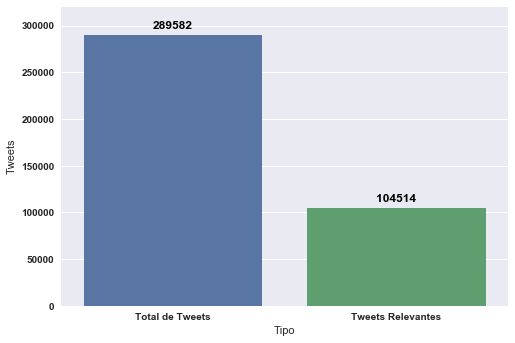

In [144]:
print('Total de Tweets: {0:9,d}'
      .format(total_tweets))
print('Tweets Relevantes: {0:6,d} [{1}%](i.e., filtrando tweets de otros contextos electorales o países)'
      .format(relevant_tweets, per_relevant))

resumen_dataset = pd.DataFrame({
    'Tipo': ['Total de Tweets', 'Tweets Relevantes'],
    'Tweets': [total_tweets, relevant_tweets]
}, index=['tt', 'tr'])

fig_resumen = sns.barplot(x='Tipo', y='Tweets', data=resumen_dataset, order=['Total de Tweets', 'Tweets Relevantes'])
ax_resumen = fig_resumen
#annotate axis = seaborn axis
for p in ax_resumen.patches:
    ax_resumen.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig_resumen.set_ylim(0,320000) #To make space for the annotations
plt.show()
resumen_dataset.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/resumen_dataset.csv')

La distinción entre entre tweets regulares y **relevantes** se debe a que cncontramos que los hashtags usados por los candidatos en sus campañas fueron también utilizados en otros paises. Pra el estudio consideramos solo aquellos tweets que además de los hashtags de interés contienen **alguna mención a cuentas de los candidatos**. 

### Número de perfiles autores de tweets

In [54]:
dbu = DBManager('users')
unique_tw_authors = dbu.search({})

In [8]:
print('En total {0} perfiles publicaron tweets, retweets, replies, y citaciones relacionadas a las elecciones'.format(unique_tw_authors.count()))

En total 20680 perfiles publicaron tweets, retweets, replies, y citaciones relacionadas a las elecciones


### Tipos de tweets

In [93]:
# Types of tweets (general)
original_tweets = db.get_original_tweets(**{})
num_original_tweets = len(original_tweets)
retweets = db.get_retweets(**{})
num_retweets = len(retweets)
replies = db.get_replies(**{})
num_replies = len(replies)
quotes = db.get_quotes(**{})
num_quotes = len(quotes)

In [8]:
# Types of tweets (partido presidencial: ANR)
original_tweets_anr = db.get_original_tweets(**{'partido': 'anr'})
num_original_tweets_anr = len(original_tweets_anr)
retweets_anr = db.get_retweets(**{'partido': 'anr'})
num_retweets_anr = len(retweets_anr)
replies_anr = db.get_replies(**{'partido': 'anr'})
num_replies_anr = len(replies_anr)
quotes_anr = db.get_quotes(**{'partido': 'anr'})
num_quotes_anr = len(quotes_anr)

In [9]:
# Types of tweets (partido presidencial: PLRA)
original_tweets_plra = db.get_original_tweets(**{'partido': 'plra'})
num_original_tweets_plra = len(original_tweets_plra)
retweets_plra = db.get_retweets(**{'partido': 'plra'})
num_retweets_plra = len(retweets_plra)
replies_plra = db.get_replies(**{'partido': 'plra'})
num_replies_plra = len(replies_plra)
quotes_plra = db.get_quotes(**{'partido': 'plra'})
num_quotes_plra = len(quotes_plra)

In [16]:
# Types of tweets (partido legislativo: Frente Guazu)
original_tweets_fg = db.get_original_tweets(**{'partido': 'fg'})
num_original_tweets_fg = len(original_tweets_fg)
retweets_fg = db.get_retweets(**{'partido': 'fg'})
num_retweets_fg = len(retweets_fg)
replies_fg = db.get_replies(**{'partido': 'fg'})
num_replies_fg = len(replies_fg)
quotes_fg = db.get_quotes(**{'partido': 'fg'})
num_quotes_fg = len(quotes_fg)

In [17]:
# Types of tweets (partido legislativo: patria querida)
original_tweets_ppq = db.get_original_tweets(**{'partido': 'ppq'})
num_original_tweets_ppq = len(original_tweets_ppq)
retweets_ppq = db.get_retweets(**{'partido': 'ppq'})
num_retweets_ppq = len(retweets_ppq)
replies_ppq = db.get_replies(**{'partido': 'ppq'})
num_replies_ppq = len(replies_ppq)
quotes_ppq = db.get_quotes(**{'partido': 'ppq'})
num_quotes_ppq = len(quotes_ppq)

In [18]:
# Types of tweets (partido legislativo: hagamos)
original_tweets_hagamos = db.get_original_tweets(**{'partido': 'hagamos'})
num_original_tweets_hagamos = len(original_tweets_hagamos)
retweets_hagamos = db.get_retweets(**{'partido': 'hagamos'})
num_retweets_hagamos = len(retweets_hagamos)
replies_hagamos = db.get_replies(**{'partido': 'hagamos'})
num_replies_hagamos = len(replies_hagamos)
quotes_hagamos = db.get_quotes(**{'partido': 'hagamos'})
num_quotes_hagamos = len(quotes_hagamos)

In [10]:
# Types of tweets (partido legislativo: pdp)
original_tweets_pdp = db.get_original_tweets(**{'partido': 'pdp'})
num_original_tweets_pdp = len(original_tweets_pdp)
retweets_pdp = db.get_retweets(**{'partido': 'pdp'})
num_retweets_pdp = len(retweets_pdp)
replies_pdp = db.get_replies(**{'partido': 'pdp'})
num_replies_pdp = len(replies_pdp)
quotes_pdp = db.get_quotes(**{'partido': 'pdp'})
num_quotes_pdp = len(quotes_pdp)

In [105]:
# Types of tweets (partido legislativo: cruzada nacional)
original_tweets_cruzada = db.get_original_tweets(**{'partido': 'cruzada'})
num_original_tweets_cruzada = len(original_tweets_cruzada)
retweets_cruzada = db.get_retweets(**{'partido': 'cruzada'})
num_retweets_cruzada = len(retweets_cruzada)
replies_cruzada = db.get_replies(**{'partido': 'cruzada'})
num_replies_cruzada = len(replies_cruzada)
quotes_cruzada = db.get_quotes(**{'partido': 'cruzada'})
num_quotes_cruzada = len(quotes_cruzada)

In [106]:
# Types of tweets (partido legislativo: unace)
original_tweets_unace = db.get_original_tweets(**{'partido': 'unace'})
num_original_tweets_unace = len(original_tweets_unace)
retweets_unace = db.get_retweets(**{'partido': 'unace'})
num_retweets_unace = len(retweets_unace)
replies_unace = db.get_replies(**{'partido': 'unace'})
num_replies_unace = len(replies_unace)
quotes_unace = db.get_quotes(**{'partido': 'unace'})
num_quotes_unace = len(quotes_unace)

In [17]:
# partido verde (no data)

In [107]:
# Types of tweets (partido legislativo: somos py)
original_tweets_somospy = db.get_original_tweets(**{'partido': 'somospy'})
num_original_tweets_somospy = len(original_tweets_somospy)
retweets_somospy = db.get_retweets(**{'partido': 'somospy'})
num_retweets_somospy = len(retweets_somospy)
replies_somospy = db.get_replies(**{'partido': 'somospy'})
num_replies_somospy = len(replies_somospy)
quotes_somospy = db.get_quotes(**{'partido': 'somospy'})
num_quotes_somospy = len(quotes_somospy)

In [108]:
# Types of tweets (partido legislativo: pen)
original_tweets_pen = db.get_original_tweets(**{'partido': 'pen'})
num_original_tweets_pen = len(original_tweets_pen)
retweets_pen = db.get_retweets(**{'partido': 'pen'})
num_retweets_pen = len(retweets_pen)
replies_pen = db.get_replies(**{'partido': 'pen'})
num_replies_pen = len(replies_pen)
quotes_pen = db.get_quotes(**{'partido': 'pen'})
num_quotes_pen = len(quotes_pen)

In [109]:
# Types of tweets (partido legislativo: mpip)
original_tweets_mpip = db.get_original_tweets(**{'partido': 'mpip'})
num_original_tweets_mpip = len(original_tweets_mpip)
retweets_mpip = db.get_retweets(**{'partido': 'mpip'})
num_retweets_mpip = len(retweets_mpip)
replies_mpip = db.get_replies(**{'partido': 'mpip'})
num_replies_mpip = len(replies_mpip)
quotes_mpip = db.get_quotes(**{'partido': 'mpip'})
num_quotes_mpip = len(quotes_mpip)

In [110]:
# Types of tweets (partido legislativo: partido democrata cristiano)
original_tweets_pdc = db.get_original_tweets(**{'partido': 'pdc'})
num_original_tweets_pdc = len(original_tweets_pdc)
retweets_pdc = db.get_retweets(**{'partido': 'pdc'})
num_retweets_pdc = len(retweets_pdc)
replies_pdc = db.get_replies(**{'partido': 'pdc'})
num_replies_pdc = len(replies_pdc)
quotes_pdc = db.get_quotes(**{'partido': 'pdc'})
num_quotes_pdc = len(quotes_pdc)

In [111]:
# Types of tweets (partido legislativo: pmas)
original_tweets_pmas = db.get_original_tweets(**{'partido': 'pmas'})
num_original_tweets_pmas = len(original_tweets_pmas)
retweets_pmas = db.get_retweets(**{'partido': 'pmas'})
num_retweets_pmas = len(retweets_pmas)
replies_pmas = db.get_replies(**{'partido': 'pmas'})
num_replies_pmas = len(replies_pmas)
quotes_pmas = db.get_quotes(**{'partido': 'pmas'})
num_quotes_pmas = len(quotes_pmas)

In [112]:
# Types of tweets (partido legislativo: avancemos)
original_tweets_avancemos = db.get_original_tweets(**{'partido': 'avancemos'})
num_original_tweets_avancemos = len(original_tweets_avancemos)
retweets_avancemos = db.get_retweets(**{'partido': 'avancemos'})
num_retweets_avancemos = len(retweets_avancemos)
replies_avancemos = db.get_replies(**{'partido': 'avancemos'})
num_replies_avancemos = len(replies_avancemos)
quotes_avancemos = db.get_quotes(**{'partido': 'avancemos'})
num_quotes_avancemos = len(quotes_avancemos)

In [102]:
# Types of tweets (partido legislativo: avancemos)
original_tweets_ganar = db.get_original_tweets(**{'partido': 'ganar'})
num_original_tweets_ganar = len(original_tweets_ganar)
retweets_ganar = db.get_retweets(**{'partido': 'ganar'})
num_retweets_ganar = len(retweets_ganar)
replies_ganar = db.get_replies(**{'partido': 'ganar'})
num_replies_ganar = len(replies_ganar)
quotes_ganar = db.get_quotes(**{'partido': 'ganar'})
num_quotes_ganar = len(quotes_ganar)

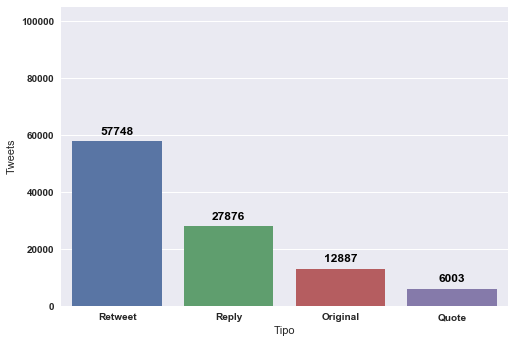

In [143]:
tweets_por_tipo = pd.DataFrame({
    'Tipo': ['Original', 'Retweet', 'Reply', 'Quote'],
    'Tweets': [num_original_tweets, num_retweets, num_replies, num_quotes]
}, index=['ot', 'rt', 'rp', 'qt'])

fig = sns.barplot(x='Tipo', y='Tweets', data=tweets_por_tipo, order=['Retweet', 'Reply', 'Original', 'Quote'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,105000) #To make space for the annotations
plt.show()
tweets_por_tipo.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/tweets_por_tipo.csv')

### Tipos de Tweets por Partido

In [127]:
# Simplify variable names (TODO: do it upfront))
o_anr = int(num_original_tweets_anr)
o_plra = int(num_original_tweets_plra)
o_pdp = int(num_original_tweets_pdp)
rt_anr = int(num_retweets_anr)
rt_plra = int(num_retweets_plra)
rt_pdp = int(num_retweets_pdp)
rp_anr = int(num_replies_anr)
rp_plra = int(num_replies_plra)
rp_pdp = int(num_replies_pdp)
q_anr = int(num_quotes_anr)
q_plra = int(num_quotes_plra)
q_pdp = int(num_quotes_pdp)

o_fg = int(num_original_tweets_fg)
rt_fg = int(num_retweets_fg)
rp_fg = int(num_replies_fg)
q_fg = int(num_quotes_fg)

o_hagamos = int(num_original_tweets_hagamos)
rt_hagamos = int(num_retweets_hagamos)
rp_hagamos = int(num_replies_hagamos)
q_hagamos = int(num_quotes_hagamos)

o_ppq = int(num_original_tweets_ppq)
rt_ppq = int(num_retweets_ppq)
rp_ppq = int(num_replies_ppq)
q_ppq = int(num_quotes_ppq)

o_ganar = int(num_original_tweets_ganar)
rt_ganar = int(num_retweets_ganar)
rp_ganar = int(num_replies_ganar)
q_ganar = int(num_quotes_ganar)



278


In [131]:
# Totales por Partido
total_anr = int(o_anr+rt_anr+rp_anr+q_anr)
total_plra = int(o_plra+rt_plra+rp_plra+q_plra)
total_pdp = int(o_pdp+rt_pdp+rp_pdp+q_pdp)
total_fg = int(o_fg+rt_fg+rp_fg+q_fg)
total_ppq = int(o_ppq+rt_ppq+rp_ppq+q_ppq)
total_hagamos = int(o_hagamos+rt_hagamos+rp_hagamos+q_hagamos)
total_ganar = int(o_ganar+rt_ganar+rp_ganar+q_ganar)


18831
36475
8091
17465
10121
4326


In [113]:
# Simplify variable names (TODO: do it upfront))
o_anr = int(num_original_tweets_anr)
o_plra = int(num_original_tweets_plra)
o_fg = int(num_original_tweets_fg)
o_ppq = int(num_original_tweets_ppq)
o_hagamos = int(num_original_tweets_hagamos)
o_pdp = int(num_original_tweets_pdp)
o_cruzada = int(num_original_tweets_cruzada)
o_unace = int(num_original_tweets_unace)
o_somospy = int(num_original_tweets_somospy)
o_pen = int(num_original_tweets_pen)
o_mpip = int(num_original_tweets_mpip)
o_pdc = int(num_original_tweets_pdc)
o_pmas = int(num_original_tweets_pmas)
o_avancemos = int(num_original_tweets_avancemos)
rt_anr = int(num_retweets_anr)
rt_plra = int(num_retweets_plra)
rt_fg = int(num_retweets_fg)
rt_ppq = int(num_retweets_ppq)
rt_hagamos = int(num_retweets_hagamos)
rt_pdp = int(num_retweets_pdp)
rt_cruzada = int(num_retweets_cruzada)
rt_unace = int(num_retweets_unace)
rt_somospy = int(num_retweets_somospy)
rt_pen = int(num_retweets_pen)
rt_mpip = int(num_retweets_mpip)
rt_pdc = int(num_retweets_pdc)
rt_pmas = int(num_retweets_pmas)
rt_avancemos = int(num_retweets_avancemos)
rp_anr = int(num_replies_anr)
rp_plra = int(num_replies_plra)
rp_fg = int(num_replies_fg)
rp_ppq = int(num_replies_ppq)
rp_hagamos = int(num_replies_hagamos)
rp_pdp = int(num_replies_pdp)
rp_cruzada = int(num_replies_cruzada)
rp_unace = int(num_replies_unace)
rp_somospy = int(num_replies_somospy)
rp_pen = int(num_replies_pen)
rp_mpip = int(num_replies_mpip)
rp_pdc = int(num_replies_pdc)
rp_pmas = int(num_replies_pmas)
rp_avancemos = int(num_replies_avancemos)
q_anr = int(num_quotes_anr)
q_plra = int(num_quotes_plra)
q_fg = int(num_quotes_fg)
q_ppq = int(num_quotes_ppq)
q_hagamos = int(num_quotes_hagamos)
q_pdp = int(num_quotes_pdp)
q_cruzada = int(num_quotes_cruzada)
q_unace = int(num_quotes_unace)
q_somospy = int(num_quotes_somospy)
q_pen = int(num_quotes_pen)
q_mpip = int(num_quotes_mpip)
q_pdc = int(num_quotes_pdc)
q_pmas = int(num_quotes_pmas)
q_avancemos = int(num_quotes_avancemos)

In [114]:
# Totales por Partido
total_anr = int(o_anr+rt_anr+rp_anr+q_anr)
total_plra = int(o_plra+rt_plra+rp_plra+q_plra)
total_fg = int(o_fg+rt_fg+rp_fg+q_fg)
total_ppq = int(o_ppq+rt_ppq+rp_ppq+q_ppq)
total_hagamos = int(o_hagamos+rt_hagamos+rp_hagamos+q_hagamos)
total_pdp = int(o_pdp+rt_pdp+rp_pdp+q_pdp)
total_cruzada = int(o_cruzada+rt_cruzada+rp_cruzada+q_cruzada)
total_unace = int(o_unace+rt_unace+rp_unace+q_unace)
total_somospy = int(o_somospy+rt_somospy+rp_somospy+q_somospy)
total_pen = int(o_pen+rt_pen+rp_pen+q_pen)
total_mpip = int(o_mpip+rt_mpip+rp_mpip+q_mpip)
total_pdc = int(o_pdc+rt_pdc+rp_pdc+q_pdc)
total_pmas = int(o_pmas+rt_pmas+rp_pmas+q_pmas)
total_avancemos = int(o_avancemos+rt_avancemos+rp_avancemos+q_avancemos)

In [132]:
# Prepare data frame for Types of Tweets by Party
tweets_por_tipo_por_partido_raw = {
    'Party': ['anr', 'plra', 'fg', 'ppq', 'hagamos', 'pdp', 'cruzada', 'unace', 'somospy', 'pen', 'mpip', 
              'pdc', 'pmas', 'avancemos', 'ganar'],
    'Original': [o_anr, o_plra, o_fg, o_ppq, o_hagamos, o_pdp, o_cruzada, o_unace, o_somospy, o_pen, o_mpip, 
                 o_pdc, o_pmas, o_avancemos, o_ganar],
    'Retweet': [rt_anr, rt_plra, rt_fg, rt_ppq, rt_hagamos, rt_pdp, rt_cruzada, rt_unace, rt_somospy, rt_pen, 
                rt_mpip, rt_pdc, rt_pmas, rt_avancemos, rt_ganar], 
    'Reply': [rp_anr, rp_plra, rp_fg, rp_ppq, rp_hagamos, rp_pdp, rp_cruzada, rp_unace, rp_somospy, rp_pen, 
              rp_mpip, rp_pdc, rp_pmas, rp_avancemos, rp_ganar], 
    'Quote': [q_anr, q_plra, q_fg, q_ppq, q_hagamos, q_pdp, q_cruzada, q_unace, q_somospy, q_pen, q_mpip, 
              q_pdc, q_pmas, q_avancemos, q_ganar],
    'Total': [total_anr, total_plra, total_fg, total_ppq, total_hagamos, total_pdp, total_cruzada, total_unace, 
              total_somospy, total_pen, total_mpip, total_pdc, total_pmas, total_avancemos, total_ganar]
}

parties =  ['anr', 'plra', 'fg', 'ppq', 'hagamos', 'pdp', 'cruzada', 'unace', 'somospy', 'pen', 'mpip', 'pdc', 
            'pmas', 'avancemos', 'ganar']
originals =  [o_anr, o_plra, o_fg, o_ppq, o_hagamos, o_pdp, o_cruzada, o_unace, o_somospy, o_pen, o_mpip, o_pdc, o_pmas, o_avancemos, o_ganar]
retweets =  [rt_anr, rt_plra, rt_fg, rt_ppq, rt_hagamos, rt_pdp, rt_cruzada, rt_unace, rt_somospy, rt_pen, rt_mpip, rt_pdc, rt_pmas, rt_avancemos, rt_ganar]
replies =  [rp_anr, rp_plra, rp_fg, rp_ppq, rp_hagamos, rp_pdp, rp_cruzada, rp_unace, rp_somospy, rp_pen, rp_mpip, rp_pdc, rp_pmas, rp_avancemos, rp_ganar] 
quotes =  [q_anr, q_plra, q_fg, q_ppq, q_hagamos, q_pdp, q_cruzada, q_unace, q_somospy, q_pen, q_mpip, q_pdc, q_pmas, q_avancemos, q_ganar]
totals =  [total_anr, total_plra, total_fg, total_ppq, total_hagamos, total_pdp, total_cruzada, total_unace, total_somospy, total_pen, total_mpip, total_pdc, total_pmas, total_avancemos, total_ganar]
positions =  ['anr', 'plra', 'fg', 'ppq', 'hagamos', 'pdp', 'cruzada', 'unace', 'somospy', 'pen', 'mpip', 'pdc', 'pmas', 'avancemos', 'ganar']


In [145]:
tweets_por_tipo_por_partido = pd.DataFrame(
    tweets_por_tipo_por_partido_raw, 
    columns = ['Party', 'Original', 'Retweet', 'Reply', 'Quote', 'Total'])

tweets_por_tipo_por_partido.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/tweets_por_tipo_por_partido.csv')

In [135]:
# y-axis in bold
rc('font', weight='bold')
 
# Heights of originals + retweets
from operator import add
bottom_for_replies = list( map(add, originals, retweets) )

# bottom_for_replies + quotes 
bottom_for_quotes = list( map(add, bottom_for_replies, replies) )

# The position of the bars on the x-axis
r = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
 
# # Names of group and bar width
names = parties
barWidth = 4

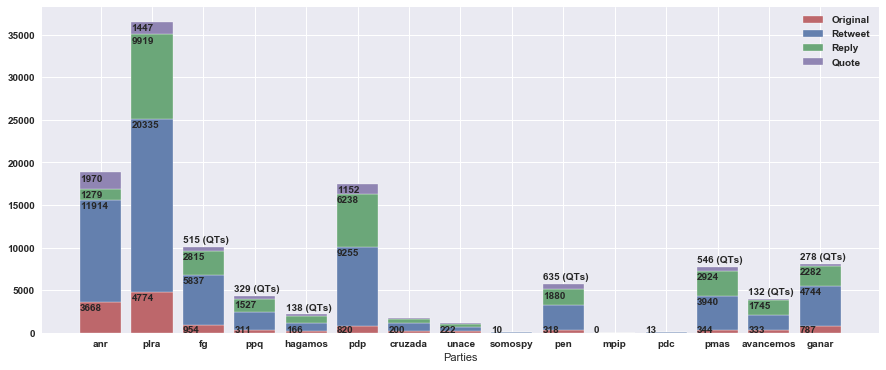

In [136]:
plt.style.use('seaborn')
plt.figure(figsize=(15,6))

# # Create brown bars
or_bar = plt.bar(r, originals, color='#bd676b', edgecolor='white', width=barWidth, tick_label=originals)
# # Create green bars (middle), on top of the firs ones
rt_bar = plt.bar(r, retweets, bottom=originals, color='#6480ae', edgecolor='white', width=barWidth, tick_label=retweets)
# # Create green bars (top)
rp_bar = plt.bar(r, replies, bottom=bottom_for_replies, color='#6ba779', edgecolor='white', width=barWidth, tick_label=replies)
# # Create green bars (top)
qt_bar = plt.bar(r, quotes, bottom=bottom_for_quotes, color='#9085b3', edgecolor='white', width=barWidth, tick_label=quotes)
 
# # Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Parties")
    
plt.legend((or_bar[0], rt_bar[0], rp_bar[0], qt_bar[0]), ('Original', 'Retweet', 'Reply', 'Quote'))

x_bars = r + r + r + r
 
# Text on the top of each barplot
for i in range(len(originals)):
    x = x_bars[i]-2
    
    # Prepare de original bar
    y = originals[i]-1000
    prev_y = y
    if y<0: 
        y = 0
    s = str(originals[i])
    plt.text(x, y, s, size = 10)
    
    # Prepare de retweet bar
    y = originals[i] + retweets[i]-1000
    s = str(retweets[i])
    
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (RTs)"
    
    if y>2500:
        plt.text(x, y, s, size = 10)
    
    # Prepare de replies bar
    y = originals[i] + retweets[i] + replies[i] - 1000
    s = str(replies[i])
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (RPs)"
    
    if y>2500:
        plt.text(x, y, s, size = 10)
    
    # Prepare de quotes bar
    y = originals[i] + retweets[i] + replies[i] + quotes[i]-1000
    s = str(quotes[i])
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (QTs)"
    
    if y>2500:
        plt.text(x, y, s, size = 10)



# # Show graphic
plt.show()


In [48]:
# sns.set(style="whitegrid")

# # Initialize the matplotlib figure
# f, ax = plt.subplots(figsize=(15, 6))

# # Plot total tweets
# sns.set_color_codes("pastel")
# sns.barplot(x="Party", y="Total", data=tweets_por_tipo_por_partido,
#             label="Total", color="b")

# # Plot original tweets
# sns.set_color_codes("muted")
# sns.barplot(x="Party", y="Retweet", data=tweets_por_tipo_por_partido,
#             label="Retweets", color="b")

# # Add a legend and informative axis label
# ax.legend(ncol=2, loc="upper right", frameon=True)
# ax.set(ylim=(0, 45000), xlabel="",
#        ylabel="Number of retweets with respect to total number of tweets by party")

# # Annotate axis = seaborn axis
# for p in ax.patches:
#     height = p.get_height()
#     if height>2000: 
#         ax.text(p.get_x()+p.get_width()/2,
#                 height+100,
#                 '{0}'.format(height),
#                 ha="center",fontsize=12, color='black')
#     elif height<2000: 
#         ax.text(p.get_x()+p.get_width()/2,
#                 height+100,
#                 '{0}'.format(height),
#                 ha="center",fontsize=12, color='black')
        

# ax.annotate('Parties with seat in congress', xy=(7.5, 0), xytext=(7.5, 35000),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )
        
# sns.despine(left=True, bottom=True)

## Evolución de tweets en el tiempo

In [146]:
# get tweets by date (traditional parties)
tw_by_date_anr = db.get_tweets_by_date(**{'partido':'anr'})
tw_by_date_plra = db.get_tweets_by_date(**{'partido':'plra'})

In [149]:
# get tweets by date (third space})
tw_by_date_fg = db.get_tweets_by_date(**{'partido':'fg'})
tw_by_date_ppq = db.get_tweets_by_date(**{'partido':'ppq'})
tw_by_date_hagamos = db.get_tweets_by_date(**{'partido':'hagamos'})
tw_by_date_pdp = db.get_tweets_by_date(**{'partido':'pdp'})
tw_by_date_cruzada = db.get_tweets_by_date(**{'partido':'cruzada'})
tw_by_date_unace = db.get_tweets_by_date(**{'partido':'unace'})
tw_by_date_pen = db.get_tweets_by_date(**{'partido':'pen'})
tw_by_date_pmas = db.get_tweets_by_date(**{'partido':'pmas'})
tw_by_date_avancemos = db.get_tweets_by_date(**{'partido':'avancemos'})
tw_by_date_ganar = db.get_tweets_by_date(**{'partido':'ganar'})

In [150]:
# convert list to pandas' dataframe
tweets_por_fecha = pd.DataFrame(tw_by_date_anr)
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_plra))
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_fg))
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_ppq))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_hagamos))
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pdp))
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_ganar))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_cruzada))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_unace))
#tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pen))
#tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pmas))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_avancemos))
tweets_por_fecha.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/tweets_por_fecha.csv')

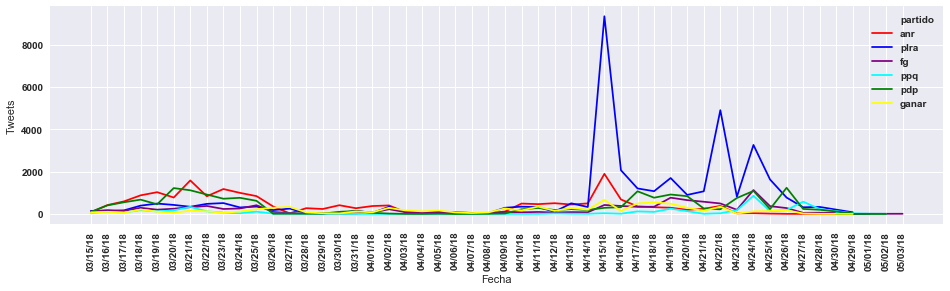

In [152]:
# draw and show the figure
# set figure size
plt.figure(figsize=(16,4))
sns.set_color_codes("dark")
fig = sns.lineplot(x='_id', y='count', data=tweets_por_fecha, palette=["red", "blue", "purple", "cyan", "green", "yellow"], hue="partido")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()

La publicación de tweets fue creciendo con el paso del tiempo. A diferencia de las internas, el día de mayor actividad fue el **15 de abril**, fecha en que se llevó a cabo del debate presidencial. Interesantemente, en los días sucesivos a las elecciones, la actividad de twitter siguió fuerte en relación al plra, lo que coincide en gran medida con las denuncias de fraudes y de problemas con las actas y el conteo de votos para las legislativas. 

## Cantidad de Tweets por Partido por día

### ANR

In [153]:
mean_tweets_anr = tweets_por_fecha[tweets_por_fecha['partido']=='anr']['count'].mean()
print('ANR publicó en promedio {0} tweets por día'.format(int(mean_tweets_anr)))

ANR publicó en promedio 409 tweets por día


### PLRA

In [154]:
mean_tweets_plra = tweets_por_fecha[tweets_por_fecha['partido']=='plra']['count'].mean()
print('El PLRA publicó en promedio {0} tweets por día'.format(int(mean_tweets_plra)))

El PLRA publicó en promedio 759 tweets por día


### Partidos no tradicionales

In [162]:
# convert list to pandas' dataframe
tweets_por_fecha_all = pd.DataFrame(tw_by_date_anr)
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_plra))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_fg))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_ppq))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_hagamos))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_pdp))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_cruzada))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_unace))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_pen))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_pmas))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_avancemos))
tweets_por_fecha_all = tweets_por_fecha_all.append(pd.DataFrame(tw_by_date_ganar))
tweets_por_fecha_all.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/tweets_por_fecha_all.csv')
mean_tweets_fg = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='fg']['count'].mean()
mean_tweets_ppq = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='ppq']['count'].mean()
mean_tweets_hagamos = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='hagamos']['count'].mean()
mean_tweets_pdp = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='pdp']['count'].mean()
mean_tweets_cruzada = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='cruzada']['count'].mean()
mean_tweets_unace = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='unace']['count'].mean()
mean_tweets_pen = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='pen']['count'].mean()
mean_tweets_pmas = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='pmas']['count'].mean()
mean_tweets_avancemos = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='avancemos']['count'].mean()
mean_tweets_ganar = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='ganar']['count'].mean()

In [163]:
print('El partido frente guazu publicó en promedio {0} tweets por día'.format(mean_tweets_fg))
print('El partido patria querida publicó en promedio {0} tweets por día'.format(mean_tweets_ppq))
print('El partido hagamos publicó en promedio {0} tweets por día'.format(mean_tweets_hagamos))
print('El partido pdp publicó en promedio {0} tweets por día'.format(mean_tweets_pdp))
print('El partido cruzada nacional publicó en promedio {0} tweets por día'.format(mean_tweets_cruzada))
print('El partido unace publicó en promedio {0} tweets por día'.format(mean_tweets_unace))
print('El partido pen publicó en promedio {0} tweets por día'.format(mean_tweets_pen))
print('El partido pmas publicó en promedio {0} tweets por día'.format(mean_tweets_pmas))
print('El partido avancemos publicó en promedio {0} tweets por día'.format(mean_tweets_avancemos))
print('El partido ganar publicó en promedio {0} tweets por día'.format(mean_tweets_ganar))



El partido frente guazu publicó en promedio 202.38 tweets por día
El partido patria querida publicó en promedio 110.82051282051282 tweets por día
El partido hagamos publicó en promedio 67.4375 tweets por día
El partido pdp publicó en promedio 371.4468085106383 tweets por día
El partido cruzada nacional publicó en promedio 56.2 tweets por día
El partido unace publicó en promedio 46.375 tweets por día
El partido pen publicó en promedio 168.2058823529412 tweets por día
El partido pmas publicó en promedio 204.05263157894737 tweets por día
El partido avancemos publicó en promedio 103.02564102564102 tweets por día
El partido ganar publicó en promedio 175.67391304347825 tweets por día


## Frecuencia de posteo

In [169]:
def get_posting_frequency_in_seconds(**kwargs):
    match = {'relevante': {'$eq': 1}}
    if 'partido' in kwargs.keys():
        match.update({'flag.partido_politico.' + kwargs['partido']: {'$gt': 0}})
    if 'movimiento' in kwargs.keys():
        match.update({'flag.movimiento.' + kwargs['movimiento']: {'$gt': 0}})
    if 'no_movimiento' in kwargs.keys():
        match.update({'flag.movimiento.' + kwargs['no_movimiento']: {'$eq': 0}})
    pipeline = [
        {'$match': match},
        {'$project': {
           'id_str': '$tweet_obj.id_str',
           'datetime': {'$dateFromString': {
                'dateString': '$tweet_py_date'
            }},
           '_id': 0,
        }},
        {'$sort': {'datetime': 1}}
    ]
    
    ret_agg = [doc for doc in db.aggregate(pipeline)]
    previous_dt = None
    for tweet in ret_agg:
        if not previous_dt:
            previous_dt = tweet['datetime']
            tweet['diff_with_previous'] = 0
            continue
        current_dt = tweet['datetime']
        tweet['diff_with_previous'] = (current_dt - previous_dt).total_seconds()
        previous_dt = current_dt
    return ret_agg

In [170]:
fp = get_posting_frequency_in_seconds(**{})
fp_df = pd.DataFrame(fp)
fp_df.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/frecuencia_posteo.csv')

In [171]:
print('En promedio se publicaron tweets relacionados a las elecciones generales {0} segundos'.
      format(round(fp_df['diff_with_previous'].mean(), 2)))

En promedio se publicaron tweets relacionados a las elecciones generales 40.51 segundos


### ANR

In [173]:
fp_anr = get_posting_frequency_in_seconds(**{'partido': 'anr'})
fp_anr_df = pd.DataFrame(fp_anr)

fp_anr_df.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/frecuencia_posteo_anr.csv')

In [174]:
print('En promedio se publicaron tweets relacionados al Partido ANR cada {0} segundos'.
      format(round(fp_anr_df['diff_with_previous'].mean(), 2)))

En promedio se publicaron tweets relacionados al Partido ANR cada 211.06 segundos


### PLRA

In [177]:
fp_plra = get_posting_frequency_in_seconds(**{'partido': 'plra'})
fp_plra_df = pd.DataFrame(fp_plra)

fp_plra_df.to_csv('/Users/cdparra/Projects/participa/politic-bots/datasets/frecuencia_posteo_plra.csv')

In [178]:
print('En promedio se publicaron tweets relacionados al partido PLRA cada {0} segundos'.
      format(round(fp_plra_df['diff_with_previous'].mean(), 2)))

En promedio se publicaron tweets relacionados al partido PLRA cada 111.33 segundos


## Tipos de Tweets por Partido en Día D

In [ ]:
# Types of tweets (general)
# original_tweets = db.get_original_tweets(**{})
# num_original_tweets = len(original_tweets)
# retweets = db.get_retweets(**{})
# num_retweets = len(retweets)
# replies = db.get_replies(**{})
# num_replies = len(replies)
# quotes = db.get_quotes(**{})
# num_quotes = len(quotes)


# Relevant dates

encuesta_ati = "03/15/18"
encuesta_cap = "03/16/18"
encuesta_tak = "03/20/18"

debate = "04/15/18"

diad = "04/22/18"

post1 = "04/21/18"
post2 = "04/22/18"


# General Counts
or_encuestas = 0
rt_encuestas = 0
rp_encuestas = 0
qt_encuestas = 0

or_debate = 0
rt_debate = 0
rp_debate = 0
qt_debate = 0

or_diad = 0
rt_diad = 0
rp_diad = 0
qt_diad = 0

or_post = 0
rt_post = 0
rp_post = 0
qt_post = 0

for tweet in original_tweets: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        or_encuestas+=1
    if tweet_date == debate:
        or_debate+=1
    if tweet_date == diad:
        or_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        or_post+=1
   
print("Original tweets during/after encuestas: {0}".format(or_encuestas))
print("Original tweets during debate: {0}".format(or_debate))
print("Original tweets during elecciones: {0}".format(or_diad))
print("Original tweets after elecciones: {0}".format(or_post))        
retweets = db.get_retweets(**{})

for tweet in retweets:
    print(retweets)
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        rt_encuestas+=1
    if tweet_date == debate:
        rt_debate+=1
    if tweet_date == diad:
        rt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        rt_post+=1
   
print("Retweets during/after encuestas: {0}".format(rt_encuestas))
print("Retweets during debate: {0}".format(rt_debate))
print("Retweets during elecciones: {0}".format(rt_diad))
print("Retweets after elecciones: {0}".format(rt_post))    

for tweet in replies: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        rp_encuestas+=1
    if tweet_date == debate:
        rp_debate+=1
    if tweet_date == diad:
        rp_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        rp_post+=1
   
print("Reply tweets during/after encuestas: {0}".format(rp_encuestas))
print("Reply tweets during debate: {0}".format(rp_debate))
print("Reply tweets during elecciones: {0}".format(rp_diad))
print("Reply tweets after elecciones: {0}".format(rp_post))    


for tweet in quotes: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        qt_encuestas+=1
    if tweet_date == debate:
        qt_debate+=1
    if tweet_date == diad:
        qt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        qt_post+=1
   
print("Quote tweets during/after encuestas: {0}".format(qt_encuestas))
print("Quote tweets during debate: {0}".format(qt_debate))
print("Quote tweets during elecciones: {0}".format(qt_diad))
print("Quote tweets after elecciones: {0}".format(qt_post))    

parties =  ['anr', 'plra', 'fg', 'ppq', 'hagamos', 'pdp', 'cruzada', 'unace', 'somospy', 'pen', 'mpip', 'pdc', 
            'pmas', 'avancemos']
or_eventos =  [or_encuestas, or_debate, or_diad, or_post]
rt_eventos =  [rt_encuestas, rt_debate, rt_diad, rt_post]
rp_eventos =  [rp_encuestas, rp_debate, rp_diad, rp_post] 
qt_eventos =  [qt_encuestas, qt_debate, qt_diad, qt_post]
positions =  ['encuestas', 'debate', 'elecciones', 'post-elecciones']

# y-axis in bold
rc('font', weight='bold')
 
# Heights of originals + retweets
from operator import add
bottom_for_rp_events = list( map(add, or_eventos, rt_eventos) )

# bottom_for_replies + quotes 
bottom_for_qt_events = list( map(add, bottom_for_rp_events, rp_eventos) )

# The position of the bars on the x-axis
r = [0, 5, 10, 15]
 
# # Names of group and bar width
names = positions
barWidth = 4

plt.style.use('seaborn')
plt.figure(figsize=(15,6))

# # Create brown bars
or_bar = plt.bar(r, or_eventos, color='#bd676b', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
rt_bar = plt.bar(r, rt_eventos, bottom=or_eventos, color='#6480ae', edgecolor='white', width=barWidth)
# # Create green bars (top)
rp_bar = plt.bar(r, rp_eventos, bottom=bottom_for_rp_events, color='#6ba779', edgecolor='white', width=barWidth)
# # Create green bars (top)
qt_bar = plt.bar(r, qt_eventos, bottom=bottom_for_qt_events, color='#9085b3', edgecolor='white', width=barWidth)
 
# # Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Parties")
    
plt.legend((or_bar[0], rt_bar[0], rp_bar[0], qt_bar[0]), ('Original', 'Retweet', 'Reply', 'Quote'))

x_bars = r + r + r + r
 
# Text on the top of each barplot
for i in range(len(or_eventos)):
    x = x_bars[i]-2
    
    # Prepare de original bar
    y = or_eventos[i]-1000
    prev_y = y
    if y<0: 
        y = 0
    s = str(or_eventos[i])
    plt.text(x, y, s, size = 16)
    
    # Prepare de retweet bar
    y = or_eventos[i] + rt_eventos[i]-1000
    s = str(rt_eventos[i])
    
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (RTs)"
    
    if y>2500:
        plt.text(x, y, s, size = 16)
    
    # Prepare de replies bar
    y = or_eventos[i] + rt_eventos[i] + rp_eventos[i] - 1000
    s = str(rp_eventos[i])
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (RPs)"
    
    if y>2500:
        plt.text(x, y, s, size = 16)
    
    # Prepare de quotes bar
    y = or_eventos[i] + rt_eventos[i] + rp_eventos[i] + qt_eventos[i]-1000
    s = str(qt_eventos[i])
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (QTs)"
    
    if y>2500:
        plt.text(x, y, s, size = 16)



# # Show graphic
plt.show()


Original tweets during/after encuestas: 681
Original tweets during debate: 3001
Original tweets during elecciones: 1035
Original tweets after elecciones: 1284


## Tipos de Tweet en Debate, Dia D y Post del PLRA

Original tweets during/after encuestas: 56
Original tweets during debate: 2227
Original tweets during elecciones: 688
Original tweets after elecciones: 788
Retweets during/after encuestas: 300
Retweets during debate: 4611
Retweets during elecciones: 3046
Retweets after elecciones: 3732
Reply tweets during/after encuestas: 251
Reply tweets during debate (plra/anr): 2341/237
Reply tweets during elecciones (plra/anr): 1129/71
Reply tweets after elecciones (plra/anr): 1398/97
Quote tweets during/after encuestas: 93
Quote tweets during debate: 161
Quote tweets during elecciones: 39
Quote tweets after elecciones: 52


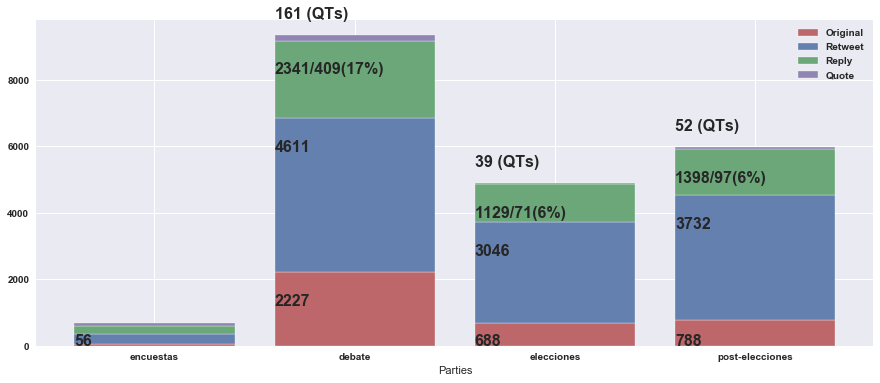

In [51]:

# General Counts
plra_or_encuestas = 0
plra_rt_encuestas = 0
plra_rp_encuestas = 0
plra_qt_encuestas = 0

plra_or_debate = 0
plra_rt_debate = 0
plra_rp_debate = 0
plra_qt_debate = 0

plra_or_diad = 0
plra_rt_diad = 0
plra_rp_diad = 0
plra_qt_diad = 0

plra_or_post = 0
plra_rt_post = 0
plra_rp_post = 0
plra_qt_post = 0

plra_rp_debate_anr = 0
plra_rp_diad_anr = 0
plra_rp_post_anr = 0



for tweet in original_tweets_plra: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        plra_or_encuestas+=1
    if tweet_date == debate:
        plra_or_debate+=1
    if tweet_date == diad:
        plra_or_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        plra_or_post+=1

   
print("Original tweets during/after encuestas: {0}".format(plra_or_encuestas))
print("Original tweets during debate: {0}".format(plra_or_debate))
print("Original tweets during elecciones: {0}".format(plra_or_diad))
print("Original tweets after elecciones: {0}".format(plra_or_post))        

for tweet in retweets_plra: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        plra_rt_encuestas+=1
    if tweet_date == debate:
        plra_rt_debate+=1
    if tweet_date == diad:
        plra_rt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        plra_rt_post+=1
   
print("Retweets during/after encuestas: {0}".format(plra_rt_encuestas))
print("Retweets during debate: {0}".format(plra_rt_debate))
print("Retweets during elecciones: {0}".format(plra_rt_diad))
print("Retweets after elecciones: {0}".format(plra_rt_post))    

for tweet in replies_plra: 
    tweet_date = tweet['tweet_py_date']
    author_party = tweet['author_party']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        plra_rp_encuestas+=1
    if tweet_date == debate:
        plra_rp_debate+=1
        if author_party == 'anr':
            plra_rp_debate_anr+=1
    if tweet_date == diad:
        plra_rp_diad+=1
        if author_party == 'anr':
            plra_rp_diad_anr+=1
    if tweet_date == post1 or  tweet_date == post2:
        plra_rp_post+=1
        if author_party == 'anr':
            plra_rp_post_anr+=1
   
print("Reply tweets during/after encuestas: {0}".format(plra_rp_encuestas))
print("Reply tweets during debate (plra/anr): {0}/{1}".format(plra_rp_debate,plra_rp_debate_anr))
print("Reply tweets during elecciones (plra/anr): {0}/{1}".format(plra_rp_diad,plra_rp_diad_anr))
print("Reply tweets after elecciones (plra/anr): {0}/{1}".format(plra_rp_post,plra_rp_post_anr))    


for tweet in quotes_plra: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        plra_qt_encuestas+=1
    if tweet_date == debate:
        plra_qt_debate+=1
    if tweet_date == diad:
        plra_qt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        plra_qt_post+=1
    author_party = tweet['author_party']
    if author_party == 'anr':
        plra_rp_debate_anr+=1
   
print("Quote tweets during/after encuestas: {0}".format(plra_qt_encuestas))
print("Quote tweets during debate: {0}".format(plra_qt_debate))
print("Quote tweets during elecciones: {0}".format(plra_qt_diad))
print("Quote tweets after elecciones: {0}".format(plra_qt_post))    

parties =  ['anr', 'plra', 'fg', 'ppq', 'hagamos', 'pdp', 'cruzada', 'unace', 'somospy', 'pen', 'mpip', 'pdc', 
            'pmas', 'avancemos']
plra_or_eventos =  [plra_or_encuestas, plra_or_debate, plra_or_diad, plra_or_post]
plra_rt_eventos =  [plra_rt_encuestas, plra_rt_debate, plra_rt_diad, plra_rt_post]
plra_rp_eventos =  [plra_rp_encuestas, plra_rp_debate, plra_rp_diad, plra_rp_post]
plra_rp_anr_eventos =  [0, plra_rp_debate_anr, plra_rp_diad_anr, plra_rp_post_anr] 
plra_qt_eventos =  [plra_qt_encuestas, plra_qt_debate, plra_qt_diad, plra_qt_post]
positions =  ['encuestas', 'debate', 'elecciones', 'post-elecciones']

# y-axis in bold
rc('font', weight='bold')
 
# Heights of originals + retweets
from operator import add
bottom_fplra_or_plra_rp_events = list( map(add, plra_or_eventos, plra_rt_eventos) )

# bottom_fplra_or_replies + quotes 
bottom_fplra_or_plra_qt_events = list( map(add, bottom_fplra_or_plra_rp_events, plra_rp_eventos) )

# The position of the bars on the x-axis
r = [0, 5, 10, 15]
 
# # Names of group and bar width
names = positions
barWidth = 4

plt.style.use('seaborn')
plt.figure(figsize=(15,6))

# # Create brown bars
plra_or_bar = plt.bar(r, plra_or_eventos, color='#bd676b', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
plra_rt_bar = plt.bar(r, plra_rt_eventos, bottom=plra_or_eventos, color='#6480ae', edgecolor='white', width=barWidth)
# # Create green bars (top)
plra_rp_bar = plt.bar(r, plra_rp_eventos, bottom=bottom_fplra_or_plra_rp_events, color='#6ba779', edgecolor='white', width=barWidth)
# # Create green bars (top)
plra_qt_bar = plt.bar(r, plra_qt_eventos, bottom=bottom_fplra_or_plra_qt_events, color='#9085b3', edgecolor='white', width=barWidth)
 
# # Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Parties")
    
plt.legend((plra_or_bar[0], plra_rt_bar[0], plra_rp_bar[0], plra_qt_bar[0]), ('Original', 'Retweet', 'Reply', 'Quote'))

x_bars = r + r + r + r
 
# Text on the top of each barplot
for i in range(len(plra_or_eventos)):
    x = x_bars[i]-2
    
    # Prepare de original bar
    y = plra_or_eventos[i]-1000
    prev_y = y
    if y<0: 
        y = 0
    s = str(plra_or_eventos[i])
    plt.text(x, y, s, size = 16)
    
    # Prepare de retweet bar
    y = plra_or_eventos[i] + plra_rt_eventos[i]-1000
    s = str(plra_rt_eventos[i])
    
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (RTs)"
    
    if y>2500:
        plt.text(x, y, s, size = 16)
    
    # Prepare de replies bar
    y = plra_or_eventos[i] + plra_rt_eventos[i] + plra_rp_eventos[i] - 1000
    plra_rp = plra_rp_eventos[i]
    plra_rp_anr = plra_rp_anr_eventos[i]
    per_rp_anr = plra_rp_anr/plra_rp*100
    s = str(plra_rp_eventos[i])+"/"+str(plra_rp_anr_eventos[i])+"("+str(int(per_rp_anr))+"%)"
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (RPs)"
    
    if y>2500:
        plt.text(x, y, s, size = 16)
    
    # Prepare de quotes bar
    y = plra_or_eventos[i] + plra_rt_eventos[i] + plra_rp_eventos[i] + plra_qt_eventos[i]-1000
    s = str(plra_qt_eventos[i])
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 800: 
        y += 1500
        s += " (QTs)"
    
    if y>2500:
        plt.text(x, y, s, size = 16)



# # Show graphic
plt.show()


## Tipos de Tweet en Debate, Dia D y Post de la ANR

Original tweets during/after encuestas: 144
Original tweets during debate: 312
Original tweets during elecciones: 169
Original tweets after elecciones: 273
Retweets during/after encuestas: 808
Retweets during debate: 1207
Retweets during elecciones: 168
Retweets after elecciones: 267
Reply tweets during/after encuestas: 51
Reply tweets during debate (anr/plra): 313/19
Reply tweets during elecciones (anr/plra): 30/0
Reply tweets after elecciones (anr/plra): 48/1
Quote tweets during/after encuestas: 270
Quote tweets during debate: 61
Quote tweets during elecciones: 10
Quote tweets after elecciones: 31


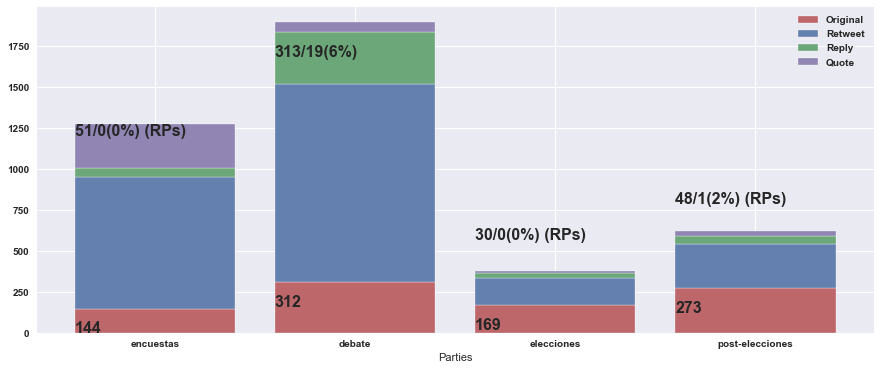

In [59]:

# General Counts
anr_or_encuestas = 0
anr_rt_encuestas = 0
anr_rp_encuestas = 0
anr_qt_encuestas = 0

anr_or_debate = 0
anr_rt_debate = 0
anr_rp_debate = 0
anr_qt_debate = 0

anr_or_diad = 0
anr_rt_diad = 0
anr_rp_diad = 0
anr_qt_diad = 0

anr_or_post = 0
anr_rt_post = 0
anr_rp_post = 0
anr_qt_post = 0

anr_rp_debate_plra = 0
anr_rp_diad_plra = 0
anr_rp_post_plra = 0



for tweet in original_tweets_anr: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        anr_or_encuestas+=1
    if tweet_date == debate:
        anr_or_debate+=1
    if tweet_date == diad:
        anr_or_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        anr_or_post+=1

   
print("Original tweets during/after encuestas: {0}".format(anr_or_encuestas))
print("Original tweets during debate: {0}".format(anr_or_debate))
print("Original tweets during elecciones: {0}".format(anr_or_diad))
print("Original tweets after elecciones: {0}".format(anr_or_post))        

for tweet in retweets_anr: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        anr_rt_encuestas+=1
    if tweet_date == debate:
        anr_rt_debate+=1
    if tweet_date == diad:
        anr_rt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        anr_rt_post+=1
   
print("Retweets during/after encuestas: {0}".format(anr_rt_encuestas))
print("Retweets during debate: {0}".format(anr_rt_debate))
print("Retweets during elecciones: {0}".format(anr_rt_diad))
print("Retweets after elecciones: {0}".format(anr_rt_post))    

for tweet in replies_anr: 
    tweet_date = tweet['tweet_py_date']
    author_party = tweet['author_party']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        anr_rp_encuestas+=1
    if tweet_date == debate:
        anr_rp_debate+=1
        if author_party == 'plra':
            anr_rp_debate_plra+=1
    if tweet_date == diad:
        anr_rp_diad+=1
        if author_party == 'plra':
            anr_rp_diad_plra+=1
    if tweet_date == post1 or  tweet_date == post2:
        anr_rp_post+=1
        if author_party == 'plra':
            anr_rp_post_plra+=1
   
print("Reply tweets during/after encuestas: {0}".format(anr_rp_encuestas))
print("Reply tweets during debate (anr/plra): {0}/{1}".format(anr_rp_debate,anr_rp_debate_plra))
print("Reply tweets during elecciones (anr/plra): {0}/{1}".format(anr_rp_diad,anr_rp_diad_plra))
print("Reply tweets after elecciones (anr/plra): {0}/{1}".format(anr_rp_post,anr_rp_post_plra))    


for tweet in quotes_anr: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        anr_qt_encuestas+=1
    if tweet_date == debate:
        anr_qt_debate+=1
    if tweet_date == diad:
        anr_qt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        anr_qt_post+=1
   
print("Quote tweets during/after encuestas: {0}".format(anr_qt_encuestas))
print("Quote tweets during debate: {0}".format(anr_qt_debate))
print("Quote tweets during elecciones: {0}".format(anr_qt_diad))
print("Quote tweets after elecciones: {0}".format(anr_qt_post))    

parties =  ['anr', 'plra', 'fg', 'ppq', 'hagamos', 'pdp', 'cruzada', 'unace', 'somospy', 'pen', 'mpip', 'pdc', 
            'pmas', 'avancemos']
anr_or_eventos =  [anr_or_encuestas, anr_or_debate, anr_or_diad, anr_or_post]
anr_rt_eventos =  [anr_rt_encuestas, anr_rt_debate, anr_rt_diad, anr_rt_post]
anr_rp_eventos =  [anr_rp_encuestas, anr_rp_debate, anr_rp_diad, anr_rp_post]
anr_rp_plra_eventos =  [0, anr_rp_debate_plra, anr_rp_diad_plra, anr_rp_post_plra] 
anr_qt_eventos =  [anr_qt_encuestas, anr_qt_debate, anr_qt_diad, anr_qt_post]
positions =  ['encuestas', 'debate', 'elecciones', 'post-elecciones']

# y-axis in bold
rc('font', weight='bold')
 
# Heights of originals + retweets
from operator import add
bottom_fanr_or_anr_rp_events = list( map(add, anr_or_eventos, anr_rt_eventos) )

# bottom_fanr_or_replies + quotes 
bottom_fanr_or_anr_qt_events = list( map(add, bottom_fanr_or_anr_rp_events, anr_rp_eventos) )

# The position of the bars on the x-axis
r = [0, 5, 10, 15]
 
# # Names of group and bar width
names = positions
barWidth = 4

plt.style.use('seaborn')
plt.figure(figsize=(15,6))

# # Create brown bars
anr_or_bar = plt.bar(r, anr_or_eventos, color='#bd676b', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
anr_rt_bar = plt.bar(r, anr_rt_eventos, bottom=anr_or_eventos, color='#6480ae', edgecolor='white', width=barWidth)
# # Create green bars (top)
anr_rp_bar = plt.bar(r, anr_rp_eventos, bottom=bottom_fanr_or_anr_rp_events, color='#6ba779', edgecolor='white', width=barWidth)
# # Create green bars (top)
anr_qt_bar = plt.bar(r, anr_qt_eventos, bottom=bottom_fanr_or_anr_qt_events, color='#9085b3', edgecolor='white', width=barWidth)
 
# # Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Parties")
    
plt.legend((anr_or_bar[0], anr_rt_bar[0], anr_rp_bar[0], anr_qt_bar[0]), ('Original', 'Retweet', 'Reply', 'Quote'))

x_bars = r + r + r + r
 
# Text on the top of each barplot
for i in range(len(anr_or_eventos)):
    x = x_bars[i]-2
    
    # Prepare de original bar
    y = anr_or_eventos[i]-150
    prev_y = y
    if y<0: 
        y = 0
    s = str(anr_or_eventos[i])
    plt.text(x, y, s, size = 16)
    
    # Prepare de retweet bar
    y = anr_or_eventos[i] + anr_rt_eventos[i]-150
    s = str(anr_rt_eventos[i])
    
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 150: 
        y += 350
        s += " (RTs)"
    
#     if y>200:
#         plt.text(x, y, s, size = 16)
    
    # Prepare de replies bar
    y = anr_or_eventos[i] + anr_rt_eventos[i] + anr_rp_eventos[i] - 150
    anr_rp = anr_rp_eventos[i]
    anr_rp_plra = anr_rp_plra_eventos[i]
    per_rp_plra = anr_rp_plra/anr_rp*100
    s = str(anr_rp_eventos[i])+"/"+str(anr_rp_plra_eventos[i])+"("+str(int(per_rp_plra))+"%)"
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 150: 
        y += 350
        s += " (RPs)"
    
    if y>200:
        plt.text(x, y, s, size = 16)
    
    # Prepare de quotes bar
    y = anr_or_eventos[i] + anr_rt_eventos[i] + anr_rp_eventos[i] + anr_qt_eventos[i]-150
    s = str(anr_qt_eventos[i])
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 150: 
        y += 350
        s += " (QTs)"
    
#     if y>200:
#         plt.text(x, y, s, size = 16)



# # Show graphic
plt.show()


## Tipos de Tweets en Fechas importantes PDP

Original tweets during/after encuestas: 106
Original tweets during debate: 14
Original tweets during elecciones: 15
Original tweets after elecciones: 25
Retweets during/after encuestas: 852
Retweets during debate: 157
Retweets during elecciones: 137
Retweets after elecciones: 323
Reply tweets during/after encuestas: 643
Reply tweets during debate (pdp/anr): 109/14
Reply tweets during elecciones (pdp/anr): 52/4
Reply tweets after elecciones (pdp/anr): 108/7
Quote tweets during/after encuestas: 120
Quote tweets during debate: 7
Quote tweets during elecciones: 15
Quote tweets after elecciones: 20


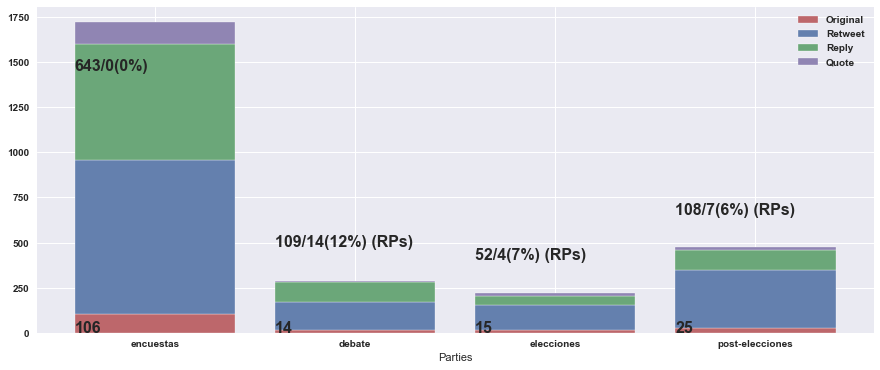

In [60]:

# General Counts
pdp_or_encuestas = 0
pdp_rt_encuestas = 0
pdp_rp_encuestas = 0
pdp_qt_encuestas = 0

pdp_or_debate = 0
pdp_rt_debate = 0
pdp_rp_debate = 0
pdp_qt_debate = 0

pdp_or_diad = 0
pdp_rt_diad = 0
pdp_rp_diad = 0
pdp_qt_diad = 0

pdp_or_post = 0
pdp_rt_post = 0
pdp_rp_post = 0
pdp_qt_post = 0

pdp_rp_debate_anr = 0
pdp_rp_diad_anr = 0
pdp_rp_post_anr = 0



for tweet in original_tweets_pdp: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        pdp_or_encuestas+=1
    if tweet_date == debate:
        pdp_or_debate+=1
    if tweet_date == diad:
        pdp_or_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        pdp_or_post+=1

   
print("Original tweets during/after encuestas: {0}".format(pdp_or_encuestas))
print("Original tweets during debate: {0}".format(pdp_or_debate))
print("Original tweets during elecciones: {0}".format(pdp_or_diad))
print("Original tweets after elecciones: {0}".format(pdp_or_post))        

for tweet in retweets_pdp: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        pdp_rt_encuestas+=1
    if tweet_date == debate:
        pdp_rt_debate+=1
    if tweet_date == diad:
        pdp_rt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        pdp_rt_post+=1
   
print("Retweets during/after encuestas: {0}".format(pdp_rt_encuestas))
print("Retweets during debate: {0}".format(pdp_rt_debate))
print("Retweets during elecciones: {0}".format(pdp_rt_diad))
print("Retweets after elecciones: {0}".format(pdp_rt_post))    

for tweet in replies_pdp: 
    tweet_date = tweet['tweet_py_date']
    author_party = tweet['author_party']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        pdp_rp_encuestas+=1
    if tweet_date == debate:
        pdp_rp_debate+=1
        if author_party == 'anr':
            pdp_rp_debate_anr+=1
    if tweet_date == diad:
        pdp_rp_diad+=1
        if author_party == 'anr':
            pdp_rp_diad_anr+=1
    if tweet_date == post1 or  tweet_date == post2:
        pdp_rp_post+=1
        if author_party == 'anr':
            pdp_rp_post_anr+=1
   
print("Reply tweets during/after encuestas: {0}".format(pdp_rp_encuestas))
print("Reply tweets during debate (pdp/anr): {0}/{1}".format(pdp_rp_debate,pdp_rp_debate_anr))
print("Reply tweets during elecciones (pdp/anr): {0}/{1}".format(pdp_rp_diad,pdp_rp_diad_anr))
print("Reply tweets after elecciones (pdp/anr): {0}/{1}".format(pdp_rp_post,pdp_rp_post_anr))    


for tweet in quotes_pdp: 
    tweet_date = tweet['tweet_py_date']
    if tweet_date == encuesta_ati or tweet_date == encuesta_cap or tweet_date == encuesta_tak:
        pdp_qt_encuestas+=1
    if tweet_date == debate:
        pdp_qt_debate+=1
    if tweet_date == diad:
        pdp_qt_diad+=1
    if tweet_date == post1 or  tweet_date == post2:
        pdp_qt_post+=1
   
print("Quote tweets during/after encuestas: {0}".format(pdp_qt_encuestas))
print("Quote tweets during debate: {0}".format(pdp_qt_debate))
print("Quote tweets during elecciones: {0}".format(pdp_qt_diad))
print("Quote tweets after elecciones: {0}".format(pdp_qt_post))    

parties =  ['pdp', 'anr', 'fg', 'ppq', 'hagamos', 'pdp', 'cruzada', 'unace', 'somospy', 'pen', 'mpip', 'pdc', 
            'pmas', 'avancemos']
pdp_or_eventos =  [pdp_or_encuestas, pdp_or_debate, pdp_or_diad, pdp_or_post]
pdp_rt_eventos =  [pdp_rt_encuestas, pdp_rt_debate, pdp_rt_diad, pdp_rt_post]
pdp_rp_eventos =  [pdp_rp_encuestas, pdp_rp_debate, pdp_rp_diad, pdp_rp_post]
pdp_rp_anr_eventos =  [0, pdp_rp_debate_anr, pdp_rp_diad_anr, pdp_rp_post_anr] 
pdp_qt_eventos =  [pdp_qt_encuestas, pdp_qt_debate, pdp_qt_diad, pdp_qt_post]
positions =  ['encuestas', 'debate', 'elecciones', 'post-elecciones']

# y-axis in bold
rc('font', weight='bold')
 
# Heights of originals + retweets
from operator import add
bottom_fpdp_or_pdp_rp_events = list( map(add, pdp_or_eventos, pdp_rt_eventos) )

# bottom_fpdp_or_replies + quotes 
bottom_fpdp_or_pdp_qt_events = list( map(add, bottom_fpdp_or_pdp_rp_events, pdp_rp_eventos) )

# The position of the bars on the x-axis
r = [0, 5, 10, 15]
 
# # Names of group and bar width
names = positions
barWidth = 4

plt.style.use('seaborn')
plt.figure(figsize=(15,6))

# # Create brown bars
pdp_or_bar = plt.bar(r, pdp_or_eventos, color='#bd676b', edgecolor='white', width=barWidth)
# # Create green bars (middle), on top of the firs ones
pdp_rt_bar = plt.bar(r, pdp_rt_eventos, bottom=pdp_or_eventos, color='#6480ae', edgecolor='white', width=barWidth)
# # Create green bars (top)
pdp_rp_bar = plt.bar(r, pdp_rp_eventos, bottom=bottom_fpdp_or_pdp_rp_events, color='#6ba779', edgecolor='white', width=barWidth)
# # Create green bars (top)
pdp_qt_bar = plt.bar(r, pdp_qt_eventos, bottom=bottom_fpdp_or_pdp_qt_events, color='#9085b3', edgecolor='white', width=barWidth)
 
# # Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Parties")
    
plt.legend((pdp_or_bar[0], pdp_rt_bar[0], pdp_rp_bar[0], pdp_qt_bar[0]), ('Original', 'Retweet', 'Reply', 'Quote'))

x_bars = r + r + r + r
 
# Text on the top of each barplot
for i in range(len(pdp_or_eventos)):
    x = x_bars[i]-2
    
    # Prepare de original bar
    y = pdp_or_eventos[i]-150
    prev_y = y
    if y<0: 
        y = 0
    s = str(pdp_or_eventos[i])
    plt.text(x, y, s, size = 16)
    
    # Prepare de retweet bar
    y = pdp_or_eventos[i] + pdp_rt_eventos[i]-150
    s = str(pdp_rt_eventos[i])
    
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 150: 
        y += 350
        s += " (RTs)"
    
#     if y>200:
#         plt.text(x, y, s, size = 16)
    
    # Prepare de replies bar
    y = pdp_or_eventos[i] + pdp_rt_eventos[i] + pdp_rp_eventos[i] - 150
    pdp_rp = pdp_rp_eventos[i]
    pdp_rp_anr = pdp_rp_anr_eventos[i]
    per_rp_anr = pdp_rp_anr/pdp_rp*100
    s = str(pdp_rp_eventos[i])+"/"+str(pdp_rp_anr_eventos[i])+"("+str(int(per_rp_anr))+"%)"
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 150: 
        y += 350
        s += " (RPs)"
    
    if y>200:
        plt.text(x, y, s, size = 16)
    
    # Prepare de quotes bar
    y = pdp_or_eventos[i] + pdp_rt_eventos[i] + pdp_rp_eventos[i] + pdp_qt_eventos[i]-150
    s = str(pdp_qt_eventos[i])
    
    # If diff between original and retweet too short, increase it
    diff_prev = y - prev_y
    prev_y = y
    if diff_prev < 150: 
        y += 350
        s += " (QTs)"
    
#     if y>200:
#         plt.text(x, y, s, size = 16)



# # Show graphic
plt.show()


## Sentimiento de respuestas de ANR al PLRA y PDP

In [39]:
plra_rp_negativos=0
plra_rp_neutros=0
plra_rp_positivos=0

plra_rp_negativos_leaning=0
plra_rp_positivos_leaning=0
for tweet in replies_plra: 
    tono = tweet['sentimiento']['tono']
    score = tweet['sentimiento']['score']
    author_party = tweet['author_party']
    if author_party == 'anr':
        if tono == "negative":
            plra_rp_negativos+=1
        if tono == "positive":
            plra_rp_positivos+=1
        if tono == "neutral":
            plra_rp_neutros+=1
        if score < 0:
            plra_rp_negativos_leaning+=1
        else:
            plra_rp_positivos_leaning+=1
            
            
print("Respuestas (-)(neutro)(+) de ANR a PLRA = ({0})({1})({2})".format(plra_rp_negativos, plra_rp_neutros, plra_rp_positivos))
print("Respuestas con tendencia (-)(+) de ANR a PLRA = ({0})({1})".format(plra_rp_negativos_leaning, plra_rp_positivos_leaning))

pdp_rp_negativos=0
pdp_rp_neutros=0
pdp_rp_positivos=0

pdp_rp_negativos_leaning=0
pdp_rp_positivos_leaning=0
for tweet in replies_pdp: 
    if hasattr(tweet, 'sentimiento'):
        tono = tweet['sentimiento']['tono']
        score = tweet['sentimiento']['score']
        author_party = tweet['author_party']
        if author_party == 'anr':
            if tono == "negative":
                pdp_rp_negativos+=1
            if tono == "positive":
                pdp_rp_positivos+=1
            if tono == "neutral":
                pdp_rp_neutros+=1
            if score < 0:
                pdp_rp_negativos_leaning+=1
            else:
                pdp_rp_positivos_leaning+=1


print("Respuestas (-)(neutro)(+) de ANR a PDP = ({0})({1})({2})".format(pdp_rp_negativos, pdp_rp_neutros, pdp_rp_positivos))
print("Respuestas con tendencia (-)(+) de ANR a PDP = ({0})({1})".format(pdp_rp_negativos_leaning, pdp_rp_positivos_leaning))


anr_rp_negativos=0
anr_rp_neutros=0
anr_rp_positivos=0

anr_rp_negativos_leaning=0
anr_rp_positivos_leaning=0
for tweet in replies_anr: 
    tono = tweet['sentimiento']['tono']
    score = tweet['sentimiento']['score']
    author_party = tweet['author_party']
    if author_party == 'plra':
        if tono == "negative":
            anr_rp_negativos+=1
        if tono == "positive":
            anr_rp_positivos+=1
        if tono == "neutral":
            anr_rp_neutros+=1
        if score < 0:
            anr_rp_negativos_leaning+=1
        else:
            anr_rp_positivos_leaning+=1
            
            
print("Respuestas (-)(neutro)(+) de PLRA a ANR = ({0})({1})({2})".format(anr_rp_negativos, anr_rp_neutros, anr_rp_positivos))
print("Respuestas con tendencia (-)(+) de PLRA a ANR = ({0})({1})".format(anr_rp_negativos_leaning, anr_rp_positivos_leaning))

anr_pdp_rp_negativos=0
anr_pdp_rp_neutros=0
anr_pdp_rp_positivos=0

anr_pdp_rp_negativos_leaning=0
anr_pdp_rp_positivos_leaning=0
for tweet in replies_anr: 
    tono = tweet['sentimiento']['tono']
    score = tweet['sentimiento']['score']
    author_party = tweet['author_party']
    if author_party == 'pdp':
        if tono == "negative":
            anr_pdp_rp_negativos+=1
        if tono == "positive":
            anr_pdp_rp_positivos+=1
        if tono == "neutral":
            anr_pdp_rp_neutros+=1
        if score < 0:
            anr_pdp_rp_negativos_leaning+=1
        else:
            anr_pdp_rp_positivos_leaning+=1
            
            
print("Respuestas (-)(neutro)(+) de PDP a ANR = ({0})({1})({2})".format(anr_pdp_rp_negativos, anr_pdp_rp_neutros, anr_pdp_rp_positivos))
print("Respuestas con tendencia (-)(+) de PDP a ANR = ({0})({1})".format(anr_pdp_rp_negativos_leaning, anr_pdp_rp_positivos_leaning))


ppq_rp_negativos=0
ppq_rp_neutros=0
ppq_rp_positivos=0

ppq_rp_negativos_leaning=0
ppq_rp_positivos_leaning=0
for tweet in replies_ppq: 
    if hasattr(tweet, 'sentimiento'):
        tono = tweet['sentimiento']['tono']
        score = tweet['sentimiento']['score']
        author_party = tweet['author_party']
        if author_party == 'anr':
            if tono == "negative":
                ppq_rp_negativos+=1
            if tono == "positive":
                ppq_rp_positivos+=1
            if tono == "neutral":
                ppq_rp_neutros+=1
            if score < 0:
                ppq_rp_negativos_leaning+=1
            else:
                ppq_rp_positivos_leaning+=1


print("Respuestas (-)(neutro)(+) de ANR a PPQ = ({0})({1})({2})".format(ppq_rp_negativos, ppq_rp_neutros, ppq_rp_positivos))
print("Respuestas con tendencia (-)(+) de ANR a PPQ = ({0})({1})".format(ppq_rp_negativos_leaning, ppq_rp_positivos_leaning))

fg_rp_negativos=0
fg_rp_neutros=0
fg_rp_positivos=0

fg_rp_negativos_leaning=0
fg_rp_positivos_leaning=0
for tweet in replies_fg: 
    if 'sentimiento' in tweet.keys():
        tono = tweet['sentimiento']['tono']
        score = tweet['sentimiento']['score']
        author_party = tweet['author_party']
        if author_party == 'anr':
            if tono == "negative":
                fg_rp_negativos+=1
            if tono == "positive":
                fg_rp_positivos+=1
            if tono == "neutral":
                fg_rp_neutros+=1
            if score < 0:
                fg_rp_negativos_leaning+=1
            else:
                fg_rp_positivos_leaning+=1


print("Respuestas (-)(neutro)(+) de ANR a FG = ({0})({1})({2})".format(fg_rp_negativos, fg_rp_neutros, fg_rp_positivos))
print("Respuestas con tendencia (-)(+) de ANR a FG = ({0})({1})".format(fg_rp_negativos_leaning, fg_rp_positivos_leaning))


Respuestas (-)(neutro)(+) de ANR a PLRA = (65)(820)(102)
Respuestas con tendencia (-)(+) de ANR a PLRA = (241)(746)
Respuestas (-)(neutro)(+) de ANR a PDP = (0)(0)(0)
Respuestas con tendencia (-)(+) de ANR a PDP = (0)(0)
Respuestas (-)(neutro)(+) de PLRA a ANR = (7)(58)(20)
Respuestas con tendencia (-)(+) de PLRA a ANR = (27)(58)
Respuestas (-)(neutro)(+) de PDP a ANR = (1)(11)(3)
Respuestas con tendencia (-)(+) de PDP a ANR = (4)(11)
Respuestas (-)(neutro)(+) de ANR a PPQ = (0)(0)(0)
Respuestas con tendencia (-)(+) de ANR a PPQ = (0)(0)
Respuestas (-)(neutro)(+) de ANR a FG = (14)(253)(33)
Respuestas con tendencia (-)(+) de ANR a FG = (75)(225)


In [37]:
rp_negativos=0
rp_neutros=0
rp_positivos=0

rp_negativos_leaning=0
rp_positivos_leaning=0

rp_anr_negativos=0
rp_anr_neutros=0
rp_anr_positivos=0

rp_anr_negativos_leaning=0
rp_anr_positivos_leaning=0

rp_plra_negativos=0
rp_plra_neutros=0
rp_plra_positivos=0

rp_plra_negativos_leaning=0
rp_plra_positivos_leaning=0

rp_pdp_negativos=0
rp_pdp_neutros=0
rp_pdp_positivos=0

rp_pdp_negativos_leaning=0
rp_pdp_positivos_leaning=0

rp_ppq_negativos=0
rp_ppq_neutros=0
rp_ppq_positivos=0

rp_ppq_negativos_leaning=0
rp_ppq_positivos_leaning=0


rp_fg_negativos=0
rp_fg_neutros=0
rp_fg_positivos=0

rp_fg_negativos_leaning=0
rp_fg_positivos_leaning=0


rp_ganar_negativos=0
rp_ganar_neutros=0
rp_ganar_positivos=0

rp_ganar_negativos_leaning=0
rp_ganar_positivos_leaning=0
count = 0
print("Processing sentiment of {0} replies".format(len(replies)))
# print("Examplen sentiment of tweet {0} is {1} of author pary {2}".format(replies[800]['tweet_obj']['id'],replies[800]['sentimiento'], replies[800]['author_party']))
for tweet in replies: 
    count += 1
#     if count < 10: 
#         print("Example sentiment of tweet {0} is {1} of author pary {2}".format(tweet['tweet_obj']['id'],tweet['sentimiento'], author_party))
#         print(hasattr(tweet, 'sentimiento'))
    
    if 'sentimiento' in tweet.keys():
        tono = tweet['sentimiento']['tono']
        score = tweet['sentimiento']['score']
        author_party = tweet['author_party']
        if tono == "negative":
            rp_negativos+=1
            if author_party == 'anr':
                rp_anr_negativos +=1
            if author_party == 'plra':
                rp_plra_negativos +=1
            if author_party == 'pdp':
                rp_pdp_negativos +=1
            if author_party == 'fg':
                rp_fg_negativos +=1
            if author_party == 'ppq':
                rp_ppq_negativos +=1
        if tono == "positive":
            rp_positivos+=1
            if author_party == 'anr':
                rp_anr_positivos +=1
            if author_party == 'plra':
                rp_plra_positivos +=1
            if author_party == 'pdp':
                rp_pdp_positivos +=1
            if author_party == 'fg':
                rp_fg_positivos +=1
            if author_party == 'ppq':
                rp_ppq_positivos +=1
        if tono == "neutral":
            rp_neutros+=1
            if author_party == 'anr':
                rp_anr_neutros +=1
            if author_party == 'plra':
                rp_plra_neutros +=1
            if author_party == 'pdp':
                rp_pdp_neutros +=1
            if author_party == 'fg':
                rp_fg_neutros +=1
            if author_party == 'ppq':
                rp_ppq_neutros +=1
        if score < 0:
            rp_negativos_leaning+=1
            if author_party == 'anr':
                rp_anr_negativos_leaning +=1
            if author_party == 'plra':
                rp_plra_negativos_leaning +=1
            if author_party == 'pdp':
                rp_pdp_negativos_leaning +=1
            if author_party == 'fg':
                rp_fg_negativos_leaning +=1
            if author_party == 'ppq':
                rp_ppq_negativos_leaning +=1
        else:
            rp_positivos_leaning+=1
            if author_party == 'anr':
                rp_anr_positivos_leaning +=1
            if author_party == 'plra':
                rp_plra_positivos_leaning +=1
            if author_party == 'pdp':
                rp_pdp_positivos_leaning +=1
            if author_party == 'fg':
                rp_fg_positivos_leaning +=1
            if author_party == 'ppq':
                rp_ppq_positivos_leaning +=1
            if author_party == 'ganar':
                rp_ganar_positivos_leaning +=1

        

print("Total replies (-)(neutro)(+) = ({0})({1})({2})".format(rp_negativos, rp_neutros, rp_positivos))
print("Total replies con tendencia (-)(+) = ({0})({1})".format(rp_negativos_leaning, rp_positivos_leaning))
print("ANR replies (-)(neutro)(+) = ({0})({1})({2})".format(rp_anr_negativos, rp_anr_neutros, rp_anr_positivos))
print("ANR replies con tendencia (-)(+) = ({0})({1})".format(rp_anr_negativos_leaning, rp_anr_positivos_leaning))

print("plra replies (-)(neutro)(+) = ({0})({1})({2})".format(rp_plra_negativos, rp_plra_neutros, rp_plra_positivos))
print("plra replies con tendencia (-)(+) = ({0})({1})".format(rp_plra_negativos_leaning, rp_plra_positivos_leaning))

print("pdp replies (-)(neutro)(+) = ({0})({1})({2})".format(rp_pdp_negativos, rp_pdp_neutros, rp_pdp_positivos))
print("pdp replies con tendencia (-)(+) = ({0})({1})".format(rp_pdp_negativos_leaning, rp_pdp_positivos_leaning))

print("fg replies (-)(neutro)(+) = ({0})({1})({2})".format(rp_fg_negativos, rp_fg_neutros, rp_fg_positivos))
print("fg replies con tendencia (-)(+) = ({0})({1})".format(rp_fg_negativos_leaning, rp_fg_positivos_leaning))

print("ppq replies (-)(neutro)(+) = ({0})({1})({2})".format(rp_ppq_negativos, rp_ppq_neutros, rp_ppq_positivos))
print("ppq replies con tendencia (-)(+) = ({0})({1})".format(rp_ppq_negativos_leaning, rp_ppq_positivos_leaning))


Processing sentiment of 27876 replies
Total replies (-)(neutro)(+) = (2132)(21449)(4225)
Total replies con tendencia (-)(+) = (7352)(20454)
ANR replies (-)(neutro)(+) = (179)(2290)(342)
ANR replies con tendencia (-)(+) = (667)(2144)
plra replies (-)(neutro)(+) = (181)(2012)(524)
plra replies con tendencia (-)(+) = (634)(2083)
pdp replies (-)(neutro)(+) = (122)(945)(206)
pdp replies con tendencia (-)(+) = (352)(921)
fg replies (-)(neutro)(+) = (0)(0)(0)
fg replies con tendencia (-)(+) = (0)(0)
ppq replies (-)(neutro)(+) = (0)(2)(0)
ppq replies con tendencia (-)(+) = (0)(2)


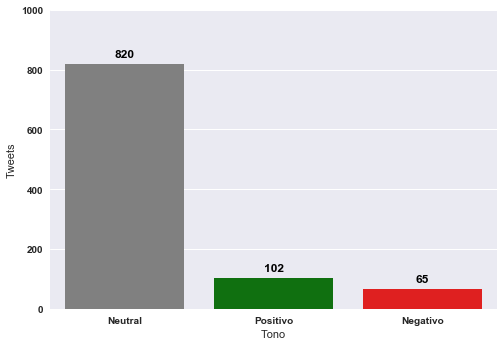

In [69]:
st_dict = {

    'Tono': ['Positivo', 'Neutral', 'Negativo'],
    'Tweets': [plra_rp_positivos, plra_rp_neutros, plra_rp_negativos]
}

st_df = pd.DataFrame(st_dict)
fig = sns.barplot(x='Tono', y='Tweets', data=st_df, 
                  order=['Neutral', 'Positivo', 'Negativo'],
                  palette=['gray', 'green','red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:""
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,1000) #To make space for the annotations
plt.show()

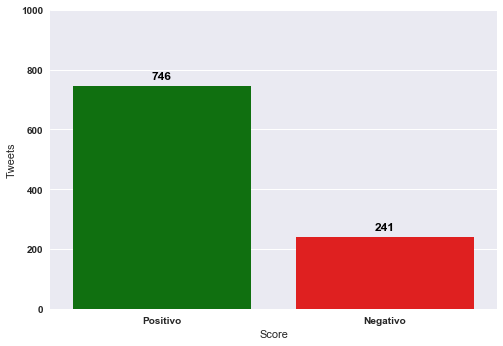

In [71]:
st_dict = {
    'Score': ['Positivo', 'Negativo'],
    'Tweets': [plra_rp_positivos_leaning,plra_rp_negativos_leaning]
}

st_df = pd.DataFrame(st_dict)
fig = sns.barplot(x='Score', y='Tweets', data=st_df, 
                  order=['Positivo', 'Negativo'],
                  palette=['green','red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,1000) #To make space for the annotations
plt.show()

## Evolución de tweets en el tiempo

In [21]:
# get tweets by date (traditional parties)
tw_by_date_anr = db.get_tweets_by_date(**{'partido':'anr'})
tw_by_date_plra = db.get_tweets_by_date(**{'partido':'plra'})

In [22]:
# get tweets by date (third space})
tw_by_date_fg = db.get_tweets_by_date(**{'partido':'fg'})
tw_by_date_ppq = db.get_tweets_by_date(**{'partido':'ppq'})
tw_by_date_hagamos = db.get_tweets_by_date(**{'partido':'hagamos'})
tw_by_date_pdp = db.get_tweets_by_date(**{'partido':'pdp'})
tw_by_date_cruzada = db.get_tweets_by_date(**{'partido':'cruzada'})
tw_by_date_unace = db.get_tweets_by_date(**{'partido':'unace'})
tw_by_date_pen = db.get_tweets_by_date(**{'partido':'pen'})
tw_by_date_pmas = db.get_tweets_by_date(**{'partido':'pmas'})
tw_by_date_avancemos = db.get_tweets_by_date(**{'partido':'avancemos'})

In [23]:
# convert list to pandas' dataframe
tweets_por_fecha = pd.DataFrame(tw_by_date_anr)
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_plra))
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_fg))
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_ppq))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_hagamos))
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pdp))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_cruzada))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_unace))
#tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pen))
#tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pmas))
# tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_avancemos))

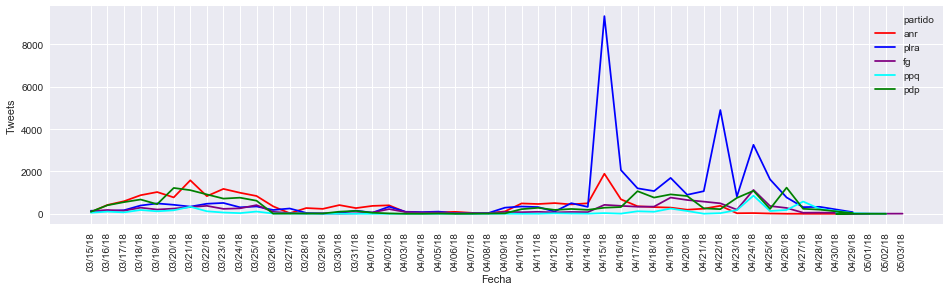

In [24]:
# draw and show the figure
# set figure size
plt.figure(figsize=(16,4))
sns.set_color_codes("dark")
fig = sns.lineplot(x='_id', y='count', data=tweets_por_fecha, palette=["red", "blue", "purple", "cyan", "green"], hue="partido")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()

La publicación de tweets fue creciendo con el paso del tiempo. A diferencia de las internas, el día de mayor actividad fue el **15 de abril**, fecha en que se llevó a cabo del debate presidencial. Interesantemente, en los días sucesivos a las elecciones, la actividad de twitter siguió fuerte en relación al plra, lo que coincide en gran medida con las denuncias de fraudes y de problemas con las actas y el conteo de votos para las legislativas. 

## Cantidad de Tweets por Partido por día

### ANR

In [25]:
mean_tweets_anr = tweets_por_fecha[tweets_por_fecha['partido']=='anr']['count'].mean()
print('ANR publicó en promedio {0} tweets por día'.format(int(mean_tweets_anr)))

ANR publicó en promedio 409 tweets por día


### PLRA

In [26]:
mean_tweets_plra = tweets_por_fecha[tweets_por_fecha['partido']=='plra']['count'].mean()
print('El PLRA publicó en promedio {0} tweets por día'.format(int(mean_tweets_plra)))

El PLRA publicó en promedio 759 tweets por día


### Partidos no tradicionales

In [28]:
# convert list to pandas' dataframe
tweets_por_fecha_all = pd.DataFrame(tw_by_date_anr)
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_plra))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_fg))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_ppq))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_hagamos))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pdp))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_cruzada))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_unace))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pen))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_pmas))
tweets_por_fecha_all = tweets_por_fecha.append(pd.DataFrame(tw_by_date_avancemos))

mean_tweets_fg = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='fg']['count'].mean()
mean_tweets_ppq = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='ppq']['count'].mean()
mean_tweets_hagamos = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='hagamos']['count'].mean()
mean_tweets_pdp = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='pdp']['count'].mean()
mean_tweets_cruzada = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='cruzada']['count'].mean()
mean_tweets_unace = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='unace']['count'].mean()
mean_tweets_pen = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='pen']['count'].mean()
mean_tweets_pmas = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='pmas']['count'].mean()
mean_tweets_avancemos = tweets_por_fecha_all[tweets_por_fecha_all['partido']=='avancemos']['count'].mean()

print('FG publicó en promedio {0} tweets por día'.format(mean_tweets_fg))
print('PPQ publicó en promedio {0} tweets por día'.format(mean_tweets_ppq))
print('PDP publicó en promedio {0} tweets por día'.format(mean_tweets_pdp))
print('Hagamos publicó en promedio {0} tweets por día'.format(mean_tweets_hagamos))
print('Cruzada publicó en promedio {0} tweets por día'.format(mean_tweets_cruzada))
print('Unace publicó en promedio {0} tweets por día'.format(mean_tweets_unace))

FG publicó en promedio 202.4 tweets por día
PPQ publicó en promedio 110.82051282051282 tweets por día
PDP publicó en promedio 371.4468085106383 tweets por día
Hagamos publicó en promedio nan tweets por día
Cruzada publicó en promedio nan tweets por día
Unace publicó en promedio nan tweets por día


## Distribución de tweets por hora el día D (22/04/18)

In [18]:
# get tweets by hour by movement
anr_tw_by_hour = db.get_tweets_by_hour('04/15/18', **{'partido': 'anr'})
plra_tw_by_hour = db.get_tweets_by_hour('04/15/18', **{'partido': 'plra'})
pdp_tw_by_hour = db.get_tweets_by_hour('04/15/18', **{'partido': 'pdp'})
fg_tw_by_hour = db.get_tweets_by_hour('04/15/18', **{'partido': 'fg'})
ppq_tw_by_hour = db.get_tweets_by_hour('04/15/18', **{'partido': 'ppq'})
# convert list to pandas' dataframe
tweets_by_hour = pd.DataFrame(anr_tw_by_hour)
tweets_by_hour = tweets_by_hour.append(pd.DataFrame(plra_tw_by_hour))
tweets_by_hour = tweets_by_hour.append(pd.DataFrame(pdp_tw_by_hour))
tweets_by_hour = tweets_by_hour.append(pd.DataFrame(fg_tw_by_hour))
tweets_by_hour = tweets_by_hour.append(pd.DataFrame(ppq_tw_by_hour))

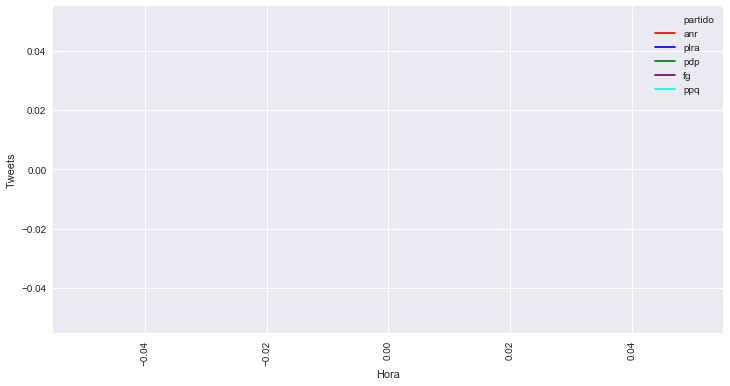

In [19]:
# set figure size
plt.figure(figsize=(12,6))
# draw and show the figure
fig = sns.lineplot(x='hour', y='count', data=tweets_by_hour, hue="partido", 
                    palette=["red", "blue", "green", "purple", "cyan"])
fig.set(xlabel='Hora', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Cantidad de tuiteros por movimiento

Análisis de la cantidad de perfiles que publicaron tweets conteniendo los hashtags de los movimientos. Los conjuntos de perfiles no son mutuamente excluyente. En otros palabras, pueden existir perfiles que hayan realizado publicado tweets usando hashtags vinculados a ambos movimientos. 

### Partido Colorado

In [91]:
import importlib
# from src.utils.db_manager import DBManager
# from src.utils.db_manager import *
# importlib.reload(afrom src.utils.db_manager import DBManager)
users = dbu.get_users_and_activity(**{'partido': 'anr'})
print('{0} usuarios tuitearon utilizando hashtags vinculados al partido ANR'.
      format(len(users)))

2043 usuarios tuitearon utilizando hashtags vinculados al partido ANR


#### Top-10 más activos con sus principales características y actividades

In [60]:
top10_tuiteros_anr = []
for i in range(10):
    tuitero_anr = {
        '1.Usuario': users[i]['screen_name'], 
        '3.Tweets': users[i]['tweets'],
        '4.Originales': users[i]['original_tweets'],
        '5.Retweets': users[i]['rts'],
        '6.Quotes': users[i]['qts'],
        '7.Replies': users[i]['rps'],
        '8.Followers': users[i]['followers'],
        '9.Friends': users[i]['friends'],
    }
    if 'pbb' in users[i].keys():
        tuitero_anr['10.Bot Score'] = users[i]['pbb'] 
        # Puntaje mínimo de un super bot que todavía existe 58.5
        # Puntaje mínimo de un super bot que ya no existe 54
        if users[i]['pbb'] > 0.53:
            tuitero_anr['2. Es cuenta Falsa?'] = 'Si'
        else: 
            tuitero_anr['2. Es cuenta Falsa?'] = 'No'
    else: 
        tuitero_anr['2. Es cuenta Falsa?'] = 'No data'
        
    top10_tuiteros_anr.append(tuitero_anr)
pd.DataFrame(top10_tuiteros_anr)

,1.Usuario,10.Bot Score,2. Es cuenta Falsa?,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends
0,Paraguaynosune,0.424198,No,466,0,466,0,0,768,179
1,Beatriz20D,0.744348,Si,379,0,297,0,82,274,706
2,Solmelga,0.294215,No,173,61,75,1,36,5869,4882
3,beelu44,0.520943,No,169,0,169,0,0,56,68
4,w4mFdMaubs7NLMo,0.539028,Si,169,41,101,11,16,137,120
5,RmjEpGVHus7g4tR,0.681337,Si,167,48,98,7,14,200,323
6,vaaGloria,0.642481,Si,166,1,129,36,0,42,64
7,k9RvTwj7nT6NwpO,0.675177,Si,159,47,90,7,15,120,177
8,mpairet,0.345073,No,155,2,40,9,104,320,253
9,EDITHVILLA3,0.477252,No,155,10,65,0,80,664,1147


### PLRA

In [61]:
users_plra = dbu.get_users_and_activity(**{'partido': 'plra'})
print('{0} usuarios tuitearon utilizando hashtags vinculados al partido PLRA'.
      format(len(users_plra)))

892 usuarios tuitearon utilizando hashtags vinculados al partido PLRA


#### Top-10 más activos y sus actividades

In [65]:
top10_tuiteros_plra = []
for i in range(10):
    tuitero_plra = {
        '1.Usuario': users_plra[i]['screen_name'], 
        '3.Tweets': users_plra[i]['tweets'],
        '4.Originales': users_plra[i]['original_tweets'],
        '5.Retweets': users_plra[i]['rts'],
        '6.Quotes': users_plra[i]['qts'],
        '7.Replies': users_plra[i]['rps'],
        '8.Followers': users_plra[i]['followers'],
        '9.Friends': users_plra[i]['friends'],
    }
    if 'pbb' in users_plra[i].keys():
        tuitero_plra['10.Bot Score'] = users_plra[i]['pbb'] 
        # Puntaje mínimo de un super bot que todavía existe 58.5
        # Puntaje mínimo de un super bot que ya no existe 54
        if users_plra[i]['pbb'] > 0.53:
            tuitero_plra['2. Es cuenta Falsa?'] = 'Si'
        else: 
            tuitero_plra['2. Es cuenta Falsa?'] = 'No'
    else: 
        tuitero_plra['2. Es cuenta Falsa?'] = 'No data'
        
    top10_tuiteros_plra.append(tuitero_plra)
pd.DataFrame(top10_tuiteros_plra)

,1.Usuario,10.Bot Score,2. Es cuenta Falsa?,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends
0,MarioMaritocue7,0.457279,No,316,0,292,0,24,63,31
1,marcosozuna_,0.380439,No,237,0,227,1,9,807,684
2,mariateresabae9,0.778265,Si,227,1,193,0,33,66,226
3,SantacruzFISA,0.659704,Si,214,7,59,36,112,179,818
4,PedroBalbuena17,1.052416,Si,198,9,117,0,72,158,1226
5,juancoolazar,0.491520,No,188,0,188,0,0,184,148
6,c10arguello,0.893541,Si,187,0,144,0,43,574,3196
7,leitorubin,0.201687,No,163,76,62,1,24,23484,1725
8,info_paraguay,1.074395,Si,161,15,106,32,8,12,115
9,lohsegovia,0.523687,No,156,0,112,0,44,42,72


### PDP

In [68]:
users_pdp = dbu.get_users_and_activity(**{'partido': 'pdp'})
print('{0} usuarios tuitearon utilizando hashtags vinculados al partido PDP'.
      format(len(users_pdp)))

169 usuarios tuitearon utilizando hashtags vinculados al partido PDP


#### Top-10 más activos y sus actividades

In [69]:
top10_tuiteros_pdp = []
for i in range(10):
    tuitero_pdp = {
        '1.Usuario': users_pdp[i]['screen_name'], 
        '3.Tweets': users_pdp[i]['tweets'],
        '4.Originales': users_pdp[i]['original_tweets'],
        '5.Retweets': users_pdp[i]['rts'],
        '6.Quotes': users_pdp[i]['qts'],
        '7.Replies': users_pdp[i]['rps'],
        '8.Followers': users_pdp[i]['followers'],
        '9.Friends': users_pdp[i]['friends'],
    }
    if 'pbb' in users_pdp[i].keys():
        tuitero_pdp['10.Bot Score'] = users_pdp[i]['pbb'] 
        # Puntaje mínimo de un super bot que todavía existe 58.5
        # Puntaje mínimo de un super bot que ya no existe 54
        if users_pdp[i]['pbb'] > 0.53:
            tuitero_pdp['2. Es cuenta Falsa?'] = 'Si'
        else: 
            tuitero_pdp['2. Es cuenta Falsa?'] = 'No'
    else: 
        tuitero_pdp['2. Es cuenta Falsa?'] = 'No data'
        
    top10_tuiteros_pdp.append(tuitero_pdp)
pd.DataFrame(top10_tuiteros_pdp)

,1.Usuario,10.Bot Score,2. Es cuenta Falsa?,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends
0,Norabeli,0.385551,No,873,4,656,0,213,2121,997
1,pdpprogresista,0.399427,No,697,70,549,40,38,1071,1874
2,desimasi2,0.196103,No,401,56,180,31,134,31821,1092
3,casanaslevi,0.177180,No,315,14,272,12,17,10173,957
4,gladysgulino,0.348731,No,268,0,261,0,7,592,110
5,gzgonzalez25,0.653194,Si,236,0,221,0,15,57,49
6,Francis48732579,0.668681,Si,217,0,179,0,38,75,110
7,rosuladasilva,0.587982,Si,211,0,202,0,9,462,1019
8,alejandrino_py,0.508711,No,207,0,203,0,4,470,534
9,AbelCantero3,0.515139,No,202,0,105,0,97,34,66


### Otros

In [96]:
users_otros = dbu.search({ "$and": [ { "party": { "$ne": "plra" } }, { "party": { "$ne": "anr" } }, { "party": { "$ne": "pdp" } }, { "party": { "$ne": None } } ] })

print('{0} usuarios tuitearon utilizando hashtags vinculados a otros partidos'.
      format(users_otros.count()))

100 usuarios tuitearon utilizando hashtags vinculados a otros partidos


#### Top-10 más activos y sus actividades

In [101]:
top10_tuiteros_otros = []
for i in range(10):
    tuitero_otros = {
        '1.Usuario': users_otros[i]['screen_name'], 
        '3.Tweets': users_otros[i]['tweets'],
        '4.Originales': users_otros[i]['original_tweets'],
        '5.Retweets': users_otros[i]['rts'],
        '6.Quotes': users_otros[i]['qts'],
        '7.Replies': users_otros[i]['rps'],
        '8.Followers': users_otros[i]['followers'],
        '9.Friends': users_otros[i]['friends'],
    }
    if 'bot_analysis' in users_otros[i].keys():
        tuitero_otros['10.Bot Score'] = users_otros[i]['bot_analysis']['pbb'] 
        # Puntaje mínimo de un super bot que todavía existe 58.5
        # Puntaje mínimo de un super bot que ya no existe 54
        if users_otros[i]['bot_analysis']['pbb'] > 0.53:
            tuitero_otros['2. Es cuenta Falsa?'] = 'Si'
        else: 
            tuitero_otros['2. Es cuenta Falsa?'] = 'No'
    else: 
        tuitero_otros['2. Es cuenta Falsa?'] = 'No data'
    
    if 'party' in users_otros[i].keys(): 
        tuitero_otros['11.Party'] = users_otros[i]['party'] 
        
        
    top10_tuiteros_otros.append(tuitero_otros)
pd.DataFrame(top10_tuiteros_otros)

,1.Usuario,10.Bot Score,11.Party,2. Es cuenta Falsa?,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends
0,samiparaguay,0.466806,ganar,No,85,39,38,1,7,1341,3299
1,Frank_Rolon11,0.452100,ganar,No,39,0,39,0,0,404,447
2,mabelvillamayor,0.194795,ganar,No,33,1,30,0,2,13210,824
3,elciclon10,0.577576,ganar,Si,31,0,31,0,0,390,1321
4,marianpinedapy,0.215782,ganar,No,30,7,17,0,6,13753,1311
5,esperanza_py,0.037037,ganar,No,29,9,18,1,1,7445,1000
6,Heidi32842107,0.699202,ganar,Si,23,1,19,0,3,8,31
7,MaximoGonzlez,1.184193,ganar,Si,19,8,0,2,9,98,1167
8,evcrojas,0.400479,ganar,No,16,1,9,1,5,1410,1282
9,mariastelacabra,0.444124,ganar,No,14,1,11,0,2,350,510


### Neutros

In [95]:
users_n = dbu.search({ "party": { "$eq": None } })

print('{0} usuarios tuitearon utilizando hashtags vinculados a otros partidos'.
      format(users_n.count()))

17476 usuarios tuitearon utilizando hashtags vinculados a otros partidos


#### Top-10 más activos y sus actividades

In [161]:
top10_tuiteros_n = []
for i in range(10):
    tuitero_n = {'1.Usuario': users_n[i]['screen_name'], 
                  '3.Tweets': users_n[i]['tweets'],
                  '4.Originales': users_n[i]['original_tweets'],
                  '5.Retweets': users_n[i]['rts'],
                  '6.Quotes': users_n[i]['qts'],
                  '7.Replies': users_n[i]['rps'],
                  '8.Followers': users_n[i]['friends'],
                  '9.Friends': users_n[i]['followers'], 
                  '99.Most interacted party': users_n[i]['most_interacted_party']
                   }
    # 0.87 es el límite del tercer quartil en la distribución de
    # las probabilidades de ser bot o cuenta falsa
#     if users_ca[i]['pbb'] > 0.87:
#         tuitero_ca['2. Es cuenta Falsa?'] = 'Si'
#     else:
#         tuitero_ca['2. Es cuenta Falsa?'] = 'No'
    top10_tuiteros_n.append(tuitero_n)
pd.DataFrame(top10_tuiteros_n)

,1.Usuario,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends,99.Most interacted party
0,ABCCardinal,416,388,0,0,28,902,192660,plra
1,CamiloSoaresM,409,6,382,1,20,9841,26945,pmas
2,1000_am,336,216,51,0,69,372,96929,plra
3,LaUnionAM800,270,269,1,0,0,283,45208,plra
4,Hugobie,213,1,77,0,135,1289,23693,pdp
5,vanev87,179,4,59,3,113,2854,4056,pdp
6,nanduti,177,70,27,1,79,30312,393911,plra
7,Nanunfila,173,1,34,0,138,132,267,avancemos
8,caraocruzpy,170,63,0,0,107,1523,17763,plra
9,FFiorioPizurno,163,136,12,7,8,411,1892,plra


## Resumen de Tuiteros por Partido

In [94]:
tuiteros_por_partido = pd.DataFrame({
    'Partido': ['anr', 'plra', 'pdp', 'otros'],
    'Tuiteros': [len(users), len(users_plra), len(users_pdp), users_otros.count()]
}, index=['anr', 'plra', 'pdp', 'otros'])
fig = sns.barplot(x='Partido', y='Tuiteros', data=tuiteros_por_partido, palette=["red", "blue", "green", "orange"])
for p in fig.patches:
    fig.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,2200) #To make space for the annotations
plt.show()

NameError: name 'users_otros' is not defined

In [179]:
trolls_anr = dbu.search({ "party": { "$eq": "anr" }, "most_interacted_party": {"$ne": "anr"} })
trolls_plra = dbu.search({ "party": { "$eq": "plra" }, "most_interacted_party": {"$ne": "plra"} })
trolls_pdp = dbu.search({ "party": { "$eq": "pdp" }, "most_interacted_party": {"$ne": "pdp"} })
trolls_ganar = dbu.search({ "party": { "$eq": "ganar" }, "most_interacted_party": {"$ne": "ganar"} })
trolls_hagamos = dbu.search({ "party": { "$eq": "hagamos" }, "most_interacted_party": {"$ne": "hagamos"} })


trolls_otros = trolls_ganar.count() + trolls_hagamos.count()

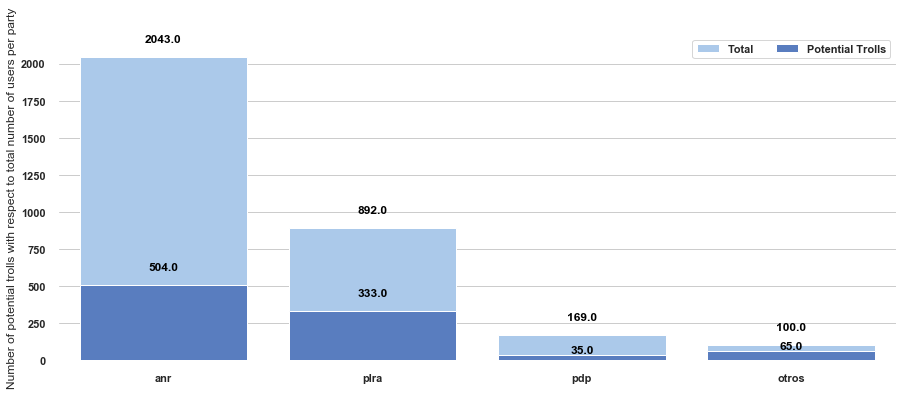

In [186]:

trolls_por_partido = pd.DataFrame({
    'Partido': ['anr', 'plra', 'pdp', 'otros'],
    'Potential Trolls': [trolls_anr.count(), trolls_plra.count(), trolls_pdp.count(), trolls_otros]
}, index=['anr', 'plra', 'pdp', 'otros'])


sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

# Plot total tweets
sns.set_color_codes("pastel")
sns.barplot(x="Partido", y="Tuiteros", data=tuiteros_por_partido,
            label="Total", color="b")

# Plot original tweets
sns.set_color_codes("muted")
sns.barplot(x="Partido", y="Potential Trolls", data=trolls_por_partido,
            label="Potential Trolls", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylim=(0, 2200), xlabel="",
       ylabel="Number of potential trolls with respect to total number of users per party")

# Annotate axis = seaborn axis
for p in ax.patches:
    height = p.get_height()
    if height<100:
        ax.text(p.get_x()+p.get_width()/2,
            height+10,
            '{0}'.format(height),
            ha="center",fontsize=12, color='black')    
    else:
        ax.text(p.get_x()+p.get_width()/2,
                height+100,
                '{0}'.format(height),
                ha="center",fontsize=12, color='black')    
        
sns.despine(left=True, bottom=True)

## Distribución de tweets por candidato

### Efrain Alegre

In [103]:
tweets_sp = db.search({'flag.candidatura.efrain alegre': {'$gt': 0},
                       'flag.candidatura.mario abdo': {'$eq': 0},
                       'flag.partido_politico.anr': {'$eq': 0},
                       'tweet_obj.user.screen_name': {'$ne': 'EfrainAlegre'}})
per_tweet_sp = round((tweets_sp.count()/tweets_hc.count())*100,2)
print('Se publicaron {0} tweets que utilizaron hashtags vinculados a la candidatura de Efrain Alegre ' \
      '({1}% del total de los tweets del PLRA)'.
      format(tweets_sp.count(), per_tweet_sp))

Se publicaron 58282 tweets que utilizaron hashtags vinculados a la candidatura de Santiago Peña (67.58% del total de los tweets de Honor Colorado)


### Mario Abdo Benítez

Hashtags de ejemplo: **`#MaritoDeLaGente`**, **`#ParaguayDeLaGente`**, **`#MaritoImparable`**, **`#MaritoPresidente`**, **`#1000KmConLaGente`**

In [104]:
tweets_ma = db.search({'flag.candidatura.santiago peña': {'$eq': 0},
                       'flag.candidatura.mario abdo': {'$gt': 0},
                       'flag.movimiento.honor colorado': {'$eq': 0},
                       'tweet_obj.user.screen_name': {'$ne': 'maritoabdo'}})
per_tweet_ma = round((tweets_ma.count()/tweets_ca.count())*100,2)
print('Se publicaron {0} tweets que utilizaron hashtags vinculados a la candidatura de Mario Abdo ' \
      '({1}% del total de los tweets de Colorado Añeteté)'.
      format(tweets_ma.count(), per_tweet_ma))

Se publicaron 46275 tweets que utilizaron hashtags vinculados a la candidatura de Mario Abdo (98.96% del total de los tweets de Colorado Añeteté)


### Tweets sobre candidatos sobre el total de su movimiento

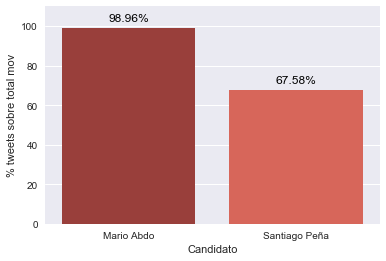

In [118]:
tweets_por_candidato_anr = pd.DataFrame({
    'Candidato': ['Santiago Peña', 'Mario Abdo'],
    '% tweets sobre total mov': [per_tweet_sp,per_tweet_ma]
}, index=['sp', 'ma'])
fig = sns.barplot(x='Candidato', y='% tweets sobre total mov', data=tweets_por_candidato_anr, 
                  order=['Mario Abdo', 'Santiago Peña'], palette="Reds_d")
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,110) #To make space for the annotations
plt.show()

## Tonalidad de Tweets

En este análisis se consideran solo tweets originales, replies, y quotes. Los retweets son descartados.

In [3]:
st = db.get_sentiment_tweets(**{'partido': 'anr'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df = pd.DataFrame(st_dict)

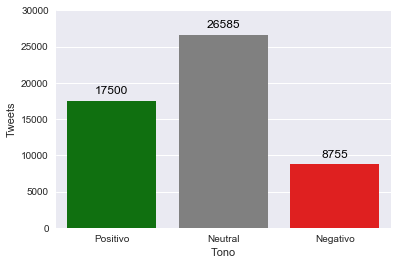

In [4]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,30000) #To make space for the annotations
plt.show()

### Honor Colorado

In [5]:
st = db.get_sentiment_tweets(**{'partido': 'anr', 'movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

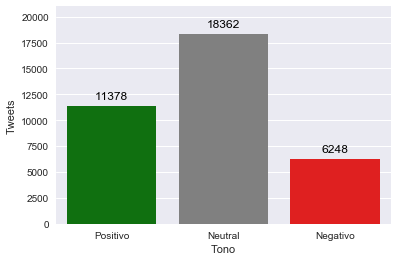

In [6]:

fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,21000) #To make space for the annotations
plt.show()

In [7]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 31.6%
Tweets Negativos: 17.4%
Tweets Neutrales: 51.0%


#### Tweets Originales

In [8]:
st = db.get_sentiment_tweets(type_query='original', **{'partido': 'anr', 'movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

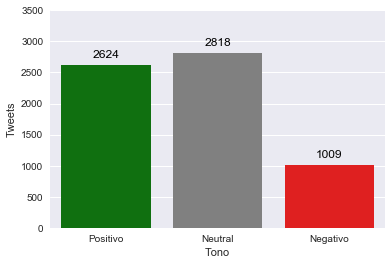

In [11]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,3500) #To make space for the annotations
plt.show()

In [12]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 40.7%
Tweets Negativos: 15.6%
Tweets Neutrales: 43.7%


#### Replies

In [13]:
st = db.get_sentiment_tweets(type_query='replies', **{'partido': 'anr', 'movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

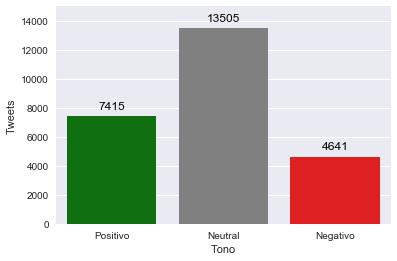

In [16]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,15000) #To make space for the annotations
plt.show()

In [17]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 29.0%
Tweets Negativos: 18.2%
Tweets Neutrales: 52.8%


#### Quotes

In [18]:
st = db.get_sentiment_tweets(type_query='quotes', **{'partido': 'anr', 'movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

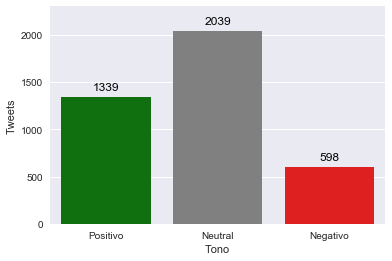

In [22]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,2300) #To make space for the annotations
plt.show()

In [23]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 33.7%
Tweets Negativos: 15.0%
Tweets Neutrales: 51.3%


### Colorado Añeteté

In [44]:
st = db.get_sentiment_tweets(**{'partido': 'anr', 'movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

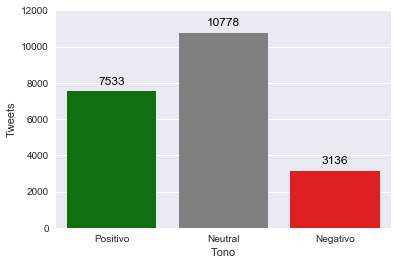

In [45]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,12000) #To make space for the annotations
plt.show()

In [59]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 35.1%
Tweets Negativos: 14.6%
Tweets Neutrales: 50.3%


#### Tweets Originales

In [30]:
st = db.get_sentiment_tweets(type_query = 'original', **{'partido': 'anr', 'movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

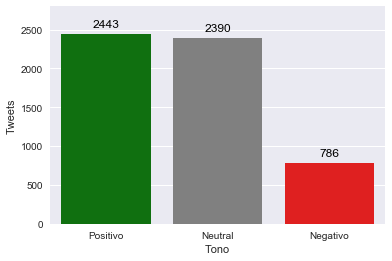

In [34]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,2800) #To make space for the annotations
plt.show()

In [35]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 43.5%
Tweets Negativos: 14.0%
Tweets Neutrales: 42.5%


#### Replies

In [36]:
st = db.get_sentiment_tweets(type_query = 'replies', **{'partido': 'anr', 'movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

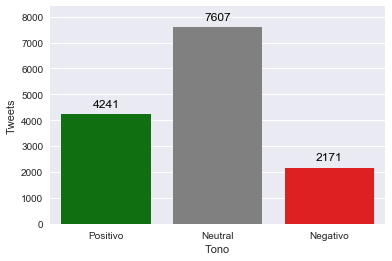

In [42]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,8400) #To make space for the annotations
plt.show()

In [43]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 30.3%
Tweets Negativos: 15.5%
Tweets Neutrales: 54.3%


#### Quotes

In [44]:
st = db.get_sentiment_tweets(type_query = 'quotes', **{'partido': 'anr', 'movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

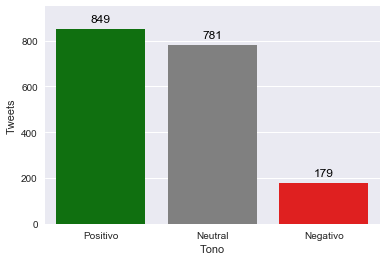

In [50]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,950) #To make space for the annotations
plt.show()

In [47]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 46.9%
Tweets Negativos: 9.9%
Tweets Neutrales: 43.2%


La distribución de tweets por tonalidad es bastante similar en ambos movimientos. Los resultados se mantienen aún dividiendo el análisis por tipo de tweet: original, reply, quote. Un aspecto interesante es que la distribución de tonalidades es ligeramente diferente para el movimiento **`Colorado Añeteté`** en cuanto a tweets originales y quotes, donde los tweets positivos sobre pasan a los neutrales.

## Distribución de Tweets por contenido

En este análisis se consideran solo tweets originales, replies, y quotes. Los retweets son descartados.

In [10]:
tot_tweets_anr_no_rt = len(original_tweets) + len(replies) + len(quotes)

### Planos

Solo texto sin links, fotos, o videos.

In [11]:
pt = db.get_plain_tweets(**{'partido': 'anr'})

### Links

Tweets con links

In [13]:
lt = db.get_tweets_with_links(**{'partido': 'anr'})

#### Top-10 dominios más frecuentes

In [24]:
la = LinkAnalyzer()
domains_url, domains = la.get_domains_and_freq(save_to_file=False, **{'partido': 'anr'})

In [25]:
domains_freq = pd.DataFrame(domains, columns=['Domain','Tweets'])
domains_freq[:10]

,Domain,Tweets
0,messenger,154
1,youtube,150
2,facebook,98
3,abc,82
4,ultimahora,36
5,efe,20
6,radio1000,18
7,goo,18
8,lavozdigital,17
9,instagram,14


### Fotos

Tweets con fotos

In [15]:
pht = db.get_tweets_with_photo(**{'partido': 'anr'})

#### Ejemplo

In [27]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="es" dir="ltr">Sumate al equipo ganador. ¡Votá <a href="https://twitter.com/hashtag/Lista2?src=hash&amp;ref_src=twsrc%5Etfw">#Lista2</a>! <a href="https://t.co/DOVRIcMWNX">pic.twitter.com/DOVRIcMWNX</a></p>&mdash; Santiago Peña (@SantiPenap) <a href="https://twitter.com/SantiPenap/status/936853394278330369?ref_src=twsrc%5Etfw">December 2, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

### Videos

Tweets con video

In [17]:
vt = db.get_tweets_with_video(**{'partido': 'anr'})

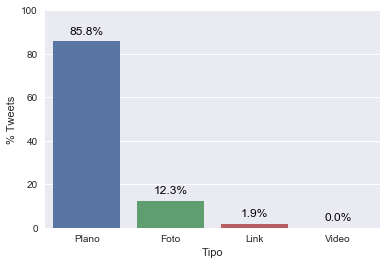

In [22]:
dis = pd.DataFrame(
    {
        'Tipo': ['Plano', 'Link', 'Foto', 'Video'],
        '% Tweets': [
            round(100*(len(pt)/tot_tweets_anr_no_rt),1),
            round(100*(len(lt)/tot_tweets_anr_no_rt),1),
            round(100*(len(pht)/tot_tweets_anr_no_rt),1),
            round(100*(len(vt)/tot_tweets_anr_no_rt),1)
        ]
    }
)
fig = sns.barplot(x='Tipo', y='% Tweets', data=dis, order=['Plano', 'Foto', 'Link', 'Video'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,100) #To make space for the annotations
plt.show()

### Honor Colorado

In [29]:
tot_tws_hc = len(original_tweets_hc) + len(replies_hc) + len(quotes_hc)

### Planos

Solo texto sin links, fotos, o videos.

In [30]:
pt = db.get_plain_tweets(**{'partido': 'anr', 'movimiento': 'honor colorado'})

In [31]:
print('Existen {0} tweets planos. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(pt), round(100*(len(pt)/tot_tws_hc),1)))

Existen 31189 tweets planos. Representan el 86.7% del total de tweets originales, replies, y quotes de HC.


### Links

Tweets con links

In [32]:
lt = db.get_tweets_with_links(**{'partido': 'anr', 'movimiento': 'honor colorado'})

In [44]:
print('Existen {0} tweets con links. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(lt), round(100*(len(lt)/tot_tws_hc),1)))

Existen 503 tweets con links. Representan el 1.4% del total de tweets originales, replies, y quotes de HC.


#### Top-10 dominios más frecuentes

In [60]:
la = LinkAnalyzer()
domains_url, domains = la.get_domains_and_freq(save_to_file=False, 
                                               **{'partido': 'anr', 'movimiento': 'honor colorado'})

In [61]:
domains_freq = pd.DataFrame(domains, columns=['Domain','Tweets'])
domains_freq[:10]

,Domain,Tweets
0,youtube,133
1,abc,57
2,facebook,51
3,ultimahora,16
4,efe,16
5,lavozdigital,12
6,rdn,8
7,santipresidente,8
8,twitter,7
9,780am,5


### Fotos

Tweets con fotos

In [35]:
pht = db.get_tweets_with_photo(**{'partido': 'anr', 'movimiento': 'honor colorado'})

In [45]:
print('Existen {0} tweets con fotos. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(pht), round(100*(len(pht)/tot_tws_hc),1)))

Existen 4296 tweets con fotos. Representan el 11.9% del total de tweets originales, replies, y quotes de HC.


### Videos

Tweets con video

In [37]:
vt = db.get_tweets_with_video(**{'partido': 'anr', 'movimiento': 'honor colorado'})

In [46]:
print('Existen {0} tweets videos. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(vt), round(100*(len(vt)/tot_tws_hc),1)))

Existen 0 tweets videos. Representan el 0.0% del total de tweets originales, replies, y quotes de HC.


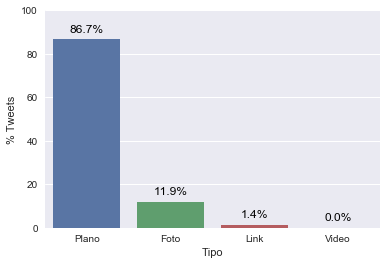

In [39]:
dis = pd.DataFrame(
    {
        'Tipo': ['Plano', 'Link', 'Foto', 'Video'],
        '% Tweets': [
            round(100*(len(pt)/tot_tws_hc),1),
            round(100*(len(lt)/tot_tws_hc),1),
            round(100*(len(pht)/tot_tws_hc),1),
            round(100*(len(vt)/tot_tws_hc),1)
        ]
    }
)
fig = sns.barplot(x='Tipo', y='% Tweets', data=dis, order=['Plano', 'Foto', 'Link', 'Video'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,100) #To make space for the annotations
plt.show()

### Colorado Añeteté

In [41]:
tot_tws_ca = len(original_tweets_ca) + len(replies_ca) + len(quotes_ca)

### Planos

Solo texto sin links, fotos, o videos.

In [47]:
pt = db.get_plain_tweets(**{'partido': 'anr', 'movimiento': 'colorado añetete'})

In [48]:
print('Existen {0} tweets planos. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(pt), round(100*(len(pt)/tot_tws_ca),1)))

Existen 18040 tweets planos. Representan el 84.1% del total de tweets originales, replies, y quotes de CA.


### Links

Tweets con links

In [49]:
lt = db.get_tweets_with_links(**{'partido': 'anr', 'movimiento': 'colorado añetete'})

In [54]:
print('Existen {0} tweets con links. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(lt), round(100*(len(lt)/tot_tws_ca),1)))

Existen 617 tweets con links. Representan el 2.9% del total de tweets originales, replies, y quotes de CA.


#### Top-10 dominios más frecuentes

In [62]:
la = LinkAnalyzer()
domains_url, domains = la.get_domains_and_freq(save_to_file=False, 
                                               **{'partido': 'anr', 'movimiento': 'colorado añetete'})

In [63]:
domains_freq = pd.DataFrame(domains, columns=['Domain','Tweets'])
domains_freq[:10]

,Domain,Tweets
0,messenger,154
1,facebook,48
2,abc,34
3,ultimahora,22
4,youtube,20
5,radio1000,18
6,instagram,11
7,lavozdigital,10
8,nanduti,8
9,goo,7


### Fotos

Tweets con fotos

In [52]:
pht = db.get_tweets_with_photo(**{'partido': 'anr', 'movimiento': 'colorado añetete'})

In [55]:
print('Existen {0} tweets con fotos. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(pht), round(100*(len(pht)/tot_tws_ca),1)))

Existen 2791 tweets con fotos. Representan el 13.0% del total de tweets originales, replies, y quotes de CA.


### Videos

Tweets con video

In [56]:
vt = db.get_tweets_with_video(**{'partido': 'anr', 'movimiento': 'colorado añetete'})

In [57]:
print('Existen {0} tweets planos. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(vt), round(100*(len(vt)/tot_tws_ca),1)))

Existen 0 tweets planos. Representan el 0.0% del total de tweets originales, replies, y quotes de CA.


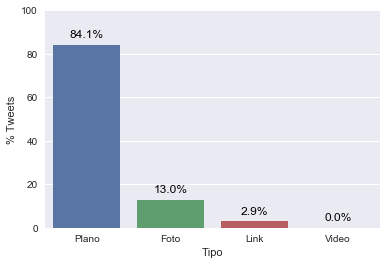

In [59]:
dis = pd.DataFrame(
    {
        'Tipo': ['Plano', 'Link', 'Foto', 'Video'],
        '% Tweets': [
            round(100*(len(pt)/tot_tws_ca),1),
            round(100*(len(lt)/tot_tws_ca),1),
            round(100*(len(pht)/tot_tws_ca),1),
            round(100*(len(vt)/tot_tws_ca),1)
        ]
    }
)
fig = sns.barplot(x='Tipo', y='% Tweets', data=dis, order=['Plano', 'Foto', 'Link', 'Video'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,100) #To make space for the annotations
plt.show()

## Hashtags más populares

Lista de hashtag más comunes utilizados en tweets relacionados a los movimientos Honor Colorado y Colorado Añeteté.

### Top-5 hashtags relacionado a Honor Colorado

In [53]:
additional_args = {'include_candidate':False, 'candidate_handler':'SantiPenap'}
hashtags_hc = db.get_hashtags_by_movement('honor colorado', **additional_args)
hashtags_populares_hc = []
sum_total = 0
for i in range(5):
    hashtag = hashtags_hc[i]
    sum_total += hashtag['count']
    hashtag_dict = {'1. Hashtag': '#' + hashtag['hashtag'], '2. Cantidad de Tweets': hashtag['count']}
    hashtags_populares_hc.append(hashtag_dict)
pd.DataFrame(hashtags_populares_hc)

,1. Hashtag,2. Cantidad de Tweets
0,#Lista2,3184
1,#SantiPresidente,3167
2,#SigamosConversando,1294
3,#HonorColorado,979
4,#ParaguayElige,759


### Top-5 hashtags relacionados a Colorado Añeteté

In [54]:
additional_args = {'include_candidate':False, 'candidate_handler':'MaritoAbdo'}
hashtags_ca = db.get_hashtags_by_movement('colorado añetete', **additional_args)
hashtags_populares_ca = []
for i in range(5):
    hashtag = hashtags_ca[i]
    hashtag_dict = {'1. Hashtag': '#' + hashtag['hashtag'], '2. Cantidad de Tweets': hashtag['count']}
    hashtags_populares_ca.append(hashtag_dict)
pd.DataFrame(hashtags_populares_ca)

,1. Hashtag,2. Cantidad de Tweets
0,#ParaguayDeLaGente,8421
1,#MaritoImparable,1404
2,#MaritoDeLaGente,1402
3,#ParaguayElige,645
4,#MaritoPresidente,560


## Red de interacciones entre perfiles

Como parte del estudio realizamos un análisis sobre la red de perfiles que publicaron tweets utilizando hashtags relacionados a la interna del partido colorado. El análisis lo centramos en las interacciones entre los perfiles, no en las relaciones entre ellos (seguidores, seguidos). Consideramos que A tuvo una interacción con B si i) publicó un tweet mencionando a B; ii) retuiteo un tweet publicado por B; iii) citó (quote) un tweet publicado por B; iv) respondió un tweet publicado por B.

Al generar la **red de interacciones** encontramos que de la misma forman parte **23.710 perfiles** que se comunicaron entre si 84.996 veces en el período de Noviembre a Enero 2018, el promedio de interacciones de un perfil en la red es 3,58. La cantidad de perfiles en la red supera en 465 el total de perfiles relacionados a la ANR. Esto se debe principalmente a que la red también incluye perfiles vinculados a otros partidos que realizaron interacciones con los de la ANR.

El perfil `CESARSANCHEZ553` fue el que más interacciones generó (463), seguido por `CesarSanchez636` (378), y `Norabeli` (354), todos vinculados principalmente al movimiento `Honor Colorado`. `Santula` (4.661), `MaritoAbdo` (4.636), y `SantiPenap` (4.532) fueron los perfiles que más interacciones recibieron, esto es menciones, retweets, replies, quotes. Es interesante notar el rol tan preponderante del periodista Santiago González (Santula). En el último mes de campaña Santula atrajo inclusive más interacciones que los mismos candidatos a la presidencia.

![Red Interacciones](../../sna/img/internas-anr-red.png)

El gráfico muestra la parte más significativa de la red de interacciones. Los perfiles son ilustrados por medio de círculos, los cuales toman principalmente dos colores. Los circulos `rojo claro` represetan perfiles cuyas interacciones contenian mayoritariamente hashtags o menciones asociadas al movimiento **`Honor Colorado`**. El `rojo oscuro` se utiliza para respresentar perfiles que principalmente participaron de comunicaciones donde se utilizaron hashtags o menciones vinculadas a la campaña del movimiento **`Colorado Añeteté`**. Existen círculo de otros colores como azul, naranja, o verde utilizados para representar otros movimientos de la ANR como el progresista colorado pero estos son irrelevantes dentro de la red.

El **tamaño de los círculos** es proporcional al número de interacciones del perfil. Así perfiles que representados por círculos grandes (p. ej., MaritoAbdo, Horacio_Cartes, SantiPenap) son muy relevantes dentro de la red por la gran cantidad de interacciones en las que se vieron envueltos. Además de tamaño y color, los círculos se encuentran etiquetados con el nombre de perfil. El tamaño de la etiqueta es proporcional al tamaño del círculo, así perfiles importantes, con muchas interacciones, tienen asociados etiquetas más grandes.

Como era de esperarse la red está dominada por perfiles que utilizaron en sus interacciones hashtags vinculados al movimiento **`Honor Colorado`**. Vimos anteriormente que estos son mayoría en el conjunto de datos. Los perfiles del movimiento **`Colorado Añeteté`** se encuentran principalmente en un sector acotado de la red y muy cercanos al perfil del candidato de este movimiento. Otra característica esperable de la red es la influencia de los perfiles de los candidatos a presidente, **Mario Abdo (`MaritoAbdo`)** y **Santiago Peña (`SantiPenap`)**. Es de notar también la importancia en la red del líder del movimiento **`Honor Colorado`**, **Horacio Cartes (`Horacio_Cartes`)**, demostrando que se vió involucrado --- esto es, menciones, retweets, replies, etc --- en gran parte de las interacciones, especialmente en las de su movimiento.

Un aspecto sorpresivo y a destacar es la importancia en la red de los periodistas **Santiago González (`Santula`)** y **Luis Bareiro (`LuisBareiro`)**. Por el color de los círculos utilizados para representar su perfiles podemos notar que principalmente los mismo se vieron involucrados en interacciones que mayoritariamente incluían hashtags menciones a los perfiles de los candidatos del movimiento oficialista **`Honor Colorado`**. Considerando la posición crítica de estos periodistas hacia el gobierno, es difícil imaginar que los mismos hayan utilizado twitter para promocionar las candidaturas de este movimiento, es más probable, sin embargo, que González y Bareiro se hayan visto involucrados en discusiones con seguidores de HC a raiz de comentarios críticos hacia el gobierno, el candidato a presidente, o el grupo político ligado a **`Honor Colorado`**. Profundizaremos en este aspecto más adelante.

### Honor Colorado

La red de interacciones del movimiento **`Honor Colorado`** está compuesta por **15.809 perfiles** (66.68% del total) que realizaron 47.436 interacciones (56% del total). En promedio, los perfiles de la red de **`Honor Colorado`** realizan 3 interacciones. `SantiPenap` (4.122), `Santula` (3.490), y `Horacio_Cartes` (3.173) son los tres perfiles que más interacciones recibieron. Lo de Peña y Cartes es entendible, lo de `Santula` es llamativo. Conociendo su postura crítica al candidato oficialista y al gobierno es de suponer que las interacciones no deberieron ser muy positivas. En una misma situación se encuentra Luis Bareiro (`LuisBareiro`), que después del perfil del presidente de la república, es el que más interacciones recibió (2.543).

También es notorio la importancia en la red de perfiles muy críticos al gobierno como el de la Senadora Desireè Masi (`desimasi2`), quién en este período recibió 877 interacciones (menciones, respuestas, citaciones, retweets). También se destaca el perfil del canal de televisión Telefuturo (`TelefuturoInfo`), quién recibió más de 1.000 interacciones de cuentas vinculas al movimiento oficialista. Cabe destacar que la línea editorial del canal Telefuturo fue una de las más críticas al gobierno durante la crisis de la enmienda. El perfil de la radio ABC Cardinal (`ABCCardinal`) y del periodística de esta radio Javier Sánchez (`JavierSanchezPy`) se destacan también como relevantes dentro de la red del movimiento **`Honor Colorado`**.

![Red Interacciones](../../sna/img/internas-anr-hc-red.png)

## Colorado Añeteté

Aproximadamente 33% del total de perfiles (**7.629**) de la red de interacciones de la ANR está compuesta por cuenta relacionadas al movimiento **`Colorado Añeteté`**. Estos perfiles interactuaron 14.333 veces durante el último mes de campaña y los primeros días de Enero de 2018. En promedio los perfiles realizaron 1.87 interacciones. Como era de esperarse y se puede notar en la gráfica, la red de **`Colorado Añeteté`** está fuertemente centrada en la figura del candidato a presidente Mario Abdo (`MaritoAbdo`). Esto lo confirman las casi 3.500 interacciones que recibió.

Aunque muy por debajo de Abdo, otros perfiles en la red de **`Colorado Añeteté`** que recibieron una importante cantidad de interacciones son `JuanAfara` (485), `enriquevp` (450), y `minaftv` (324). `Paraguaynosune` es el perfil que más interacciones generó (167) seguido de `Solmega` (92) y `Beatriz20D` (75).

![Red Interacciones](../../sna/img/internas-anr-ca-red.png)

## Interacciones alrededor de perfiles relevantes

Aquí analizaremos las interacciones alrededor de perfiles relevantes en la red pero no directamente vinculados a la campaña electoral de las internas de la ANR, p.ej., `Santula`, `LuisBareiro`, `enriquevp`, `desimasi2`.

### Santiago González (Santula)

In [13]:
na = NetworkAnalyzer()
inter_santula = na.get_interactions('Santula')

#### Interacciones generadas

Las interacciones generadas son todas aquellas publicaciones realizadas por el usuario. Esto comprende los tweets originales, los retweets, las respuestas a tweets, y las citaciones

In [17]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_santula['out_interactions']['total']['count'], \
             inter_santula['out_interactions']['retweets']['count'], \
             inter_santula['out_interactions']['replies']['count'], \
             inter_santula['out_interactions']['mentions']['count'], \
             inter_santula['out_interactions']['quotes']['count']))

145 tweets; 24 retweets, 6 respuestas, 111 menciones, y 4 citaciones


##### Perfiles más retuiteados

In [21]:
top_rts = []
out_inter_santula = inter_santula['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total retweets': out_inter_santula[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,algoandamalpy,12
1,TelefuturoInfo,3
2,juankilezcano,3
3,minaftv,2
4,Santula,1


##### Perfiles más mencionados

In [22]:
top_mts = []
out_inter_santula = inter_santula['out_interactions']['mentions']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total menciones': out_inter_santula[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,Telefuturo,38
1,MaritoAbdo,28
2,SantiPenap,24
3,EfrainAlegre,13
4,nanduti,2


##### Perfiles más citados

In [23]:
top_qts = []
out_inter_santula = inter_santula['out_interactions']['quotes']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total citas': out_inter_santula[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citas
0,MoWet2015,1
1,UltimaHoracom,1
2,algoandamalpy,1
3,MaritoAbdo,1


##### Perfiles a quiénes más respondió

In [25]:
top_rps = []
out_inter_santula = inter_santula['out_interactions']['replies']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total respuestas': out_inter_santula[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,josemfer,3
1,PolemicaPy,1
2,MariaGodoyMora1,1
3,majozpires,1


Lo más resaltante de las interacciones de `@Santula` es que durante el período de muestreo un importante número de sus publicaciones se centraron en tweets que mencionaron a los principales pre-candidatos a la presidencia de la república, `Mario Abdo Benítez`, `Santiago Peña`, y `Efrain Alegre`.

#### Interacciones recibidas

Las interacciones recibidas corresponde a todos aquellos tweets donde se menciona al usuario, se cita al usuario, se retuitea o responde a una publicación del usuario.

In [26]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_santula['in_interactions']['total']['count'], \
             inter_santula['in_interactions']['retweets']['count'], \
             inter_santula['in_interactions']['replies']['count'], \
             inter_santula['in_interactions']['mentions']['count'], \
             inter_santula['in_interactions']['quotes']['count']))

7743 tweets; 6000 retweets, 1563 respuestas, 118 menciones, y 62 citaciones


##### Perfiles que más retuiteron sus publicaciones

In [27]:
top_rts = []
in_inter_santula = inter_santula['in_interactions']['retweets']['details']
max_iter = 5 if len(in_inter_santula) > 5 else len(in_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_santula[i][0], 
                '2.Total retweets': in_inter_santula[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,ChristianDoldan,32
1,Norabeli,14
2,Beatriz20D,14
3,christianchena,14
4,Ever_Caceres,13


##### Perfiles que más respondieron a sus publicaciones

In [28]:
top_rps = []
in_inter_santula = inter_santula['in_interactions']['replies']['details']
max_iter = 5 if len(in_inter_santula) > 5 else len(in_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_santula[i][0], 
                '2.Total respuestas': in_inter_santula[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,SemideiOmar,10
1,FarinaLfa,9
2,MariaelenaSugat,9
3,SantacruzFISA,8
4,RaulOjedaCano2,8


##### Perfiles que más mencionaron a Santula

In [29]:
top_mts = []
in_inter_santula = inter_santula['in_interactions']['mentions']['details']
max_iter = 5 if len(in_inter_santula) > 5 else len(in_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_santula[i][0], 
                '2.Total menciones': in_inter_santula[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,CarlosZ86636382,8
1,Juangpy,7
2,_kimberlyxc,5
3,ANIBALCSPDS,4
4,josanortiz88,4


##### Perfiles que más citaron publicaciones de Santula

In [30]:
top_qts = []
in_inter_santula = inter_santula['in_interactions']['quotes']['details']
max_iter = 5 if len(in_inter_santula) > 5 else len(in_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_santula[i][0], 
                '2.Total citaciones': in_inter_santula[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,heriberto7502,5
1,jbenjaminb,2
2,narakopguare,2
3,hova_ata,2
4,cyzal,2


Casi el 80% (6000 de 7743) de las interacciones recibidas por `Santula` corresponde a retweets de sus publicaciones. Esto demuestra la relevancia de este perfil dentro de la red del movimiento `Honor Colorado`. Conociendo la postura crítica de `Santula` hacia las candidaturas de este movimiento se puede esperar que el contenido de estas publicaciones no hayan sido precisamente de promoción a los candidatos de HC.

Otro aspecto a resaltar es la actividad del perfil `SemideiOmar`, quién respondió a casi el 10% de total de tweets (no retweets) de `Santula`. También existen perfiles con muchas menciones a `Santula` cuyos nombres no parecen ser reales, por ejemplo `CarlosZ86636382`.

### Luis Bareiro (LuisBareiro)

In [31]:
na = NetworkAnalyzer()
inter_bareiro = na.get_interactions('LuisBareiro')

#### Interacciones generadas

In [32]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_bareiro['out_interactions']['total']['count'], \
             inter_bareiro['out_interactions']['retweets']['count'], \
             inter_bareiro['out_interactions']['replies']['count'], \
             inter_bareiro['out_interactions']['mentions']['count'], \
             inter_bareiro['out_interactions']['quotes']['count']))

17 tweets; 6 retweets, 10 respuestas, 1 menciones, y 0 citaciones


##### Perfiles más retuiteados

In [33]:
top_rts = []
out_inter_bareiro = inter_bareiro['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_bareiro) > 5 else len(out_inter_bareiro)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_bareiro[i][0], 
                '2.Total retweets': out_inter_bareiro[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,AM_1080,2
1,latelePy,2
2,Santula,1
3,Dii_villalba,1


##### Perfiles a quiénes más respondió

In [34]:
top_rps = []
out_inter_bareiro = inter_bareiro['out_interactions']['replies']['details']
max_iter = 5 if len(out_inter_bareiro) > 5 else len(out_inter_bareiro)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_bareiro[i][0], 
                '2.Total respuestas': out_inter_bareiro[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,DeaMaldonado,2
1,gabiotago,2
2,IsidroRicardoV4,1
3,jfrancovergara,1
4,vlamanchao,1


#### Interacciones recibidas

In [35]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_bareiro['in_interactions']['total']['count'], \
             inter_bareiro['in_interactions']['retweets']['count'], \
             inter_bareiro['in_interactions']['replies']['count'], \
             inter_bareiro['in_interactions']['mentions']['count'], \
             inter_bareiro['in_interactions']['quotes']['count']))

2938 tweets; 2680 retweets, 207 respuestas, 38 menciones, y 13 citaciones


##### Perfiles que más retuitearon sus publicaciones

In [36]:
top_rts = []
in_inter_bareiro = inter_bareiro['in_interactions']['retweets']['details']
max_iter = 5 if len(in_inter_bareiro) > 5 else len(in_inter_bareiro)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_bareiro[i][0], 
                '2.Total retweets': in_inter_bareiro[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,espiridion01,8
1,GloriaB2B,2
2,JUAMPA88,1
3,89_caballero,1
4,emersonjonas101,1


##### Perfiles que más respondieron a sus publicaciones

In [37]:
top_rps = []
in_inter_bareiro = inter_bareiro['in_interactions']['replies']['details']
max_iter = 5 if len(in_inter_bareiro) > 5 else len(in_inter_bareiro)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_bareiro[i][0], 
                '2.Total respuestas': in_inter_bareiro[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,rey_europa,5
1,britez_ortiz1,3
2,DeaMaldonado,3
3,nicomartinezpy,2
4,gabiotago,2


##### Perfiles que más mencionaron a LuisBareiro

In [38]:
top_mts = []
in_inter_bareiro = inter_bareiro['in_interactions']['mentions']['details']
max_iter = 5 if len(in_inter_bareiro) > 5 else len(in_inter_bareiro)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_bareiro[i][0], 
                '2.Total menciones': in_inter_bareiro[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,CarlosZ86636382,6
1,caramarillapy,4
2,Luinoguera,2
3,agustinkonrad27,2
4,maue_escobar,1


##### Perfiles que más citaron a LuisBareiro

In [39]:
top_qts = []
in_inter_bareiro = inter_bareiro['in_interactions']['quotes']['details']
max_iter = 5 if len(in_inter_bareiro) > 5 else len(in_inter_bareiro)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_bareiro[i][0], 
                '2.Total citaciones': in_inter_bareiro[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,pascolili,1
1,heriberto7502,1
2,DnicCristaldo,1
3,andregp87,1
4,fabiigonza,1


Más del 90% (2680 de 2938) de las interacciones recibidas por `LuisBareiro` corresponden a retweets de su publicaciones, demostrando el gran alcance de sus tweets. Otro aspecto destacable es que el mismo perfil `CarlosZ86636382` que más menciones hizo sobre `Santula` es el mismo que más mencionó a `LuisBareiro`. 

### Enrique Vargas Peña (enriquevp)

In [41]:
na = NetworkAnalyzer()
inter_evp = na.get_interactions('enriquevp')

#### Interacciones generadas

In [42]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_evp['out_interactions']['total']['count'], \
             inter_evp['out_interactions']['retweets']['count'], \
             inter_evp['out_interactions']['replies']['count'], \
             inter_evp['out_interactions']['mentions']['count'], \
             inter_evp['out_interactions']['quotes']['count']))

153 tweets; 16 retweets, 48 respuestas, 81 menciones, y 8 citaciones


##### Perfiles más retuiteados

In [43]:
top_rts = []
out_inter_evp = inter_evp['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total retweets': out_inter_evp[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,Santula,4
1,patriaquerida,3
2,EfrainAlegre,2
3,ABCCardinal,2
4,JavierSanchezPy,1


##### Perfiles a los que más respondió

In [44]:
top_rps = []
out_inter_evp = inter_evp['out_interactions']['replies']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total respuestas': out_inter_evp[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,MaritoAbdo,17
1,SantiPenap,6
2,fidelzavala2018,6
3,gduartcacavelos,4
4,sebavillarejo,4


##### Perfiles más mencionados

In [45]:
top_mts = []
out_inter_evp = inter_evp['out_interactions']['mentions']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total menciones': out_inter_evp[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,SantiPenap,27
1,MaritoAbdo,17
2,SinLimites_RG,6
3,EfrainAlegre,5
4,patriaquerida,4


##### Perfiles más citados

In [46]:
top_qts = []
out_inter_evp = inter_evp['out_interactions']['quotes']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total citaciones': out_inter_evp[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,ABCDigital,2
1,jotabernabe,2
2,Copanosetoca,1
3,smongelos,1
4,sandralopezpy,1


#### Interacciones recibidas

In [47]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_evp['in_interactions']['total']['count'], \
             inter_evp['in_interactions']['retweets']['count'], \
             inter_evp['in_interactions']['replies']['count'], \
             inter_evp['in_interactions']['mentions']['count'], \
             inter_evp['in_interactions']['quotes']['count']))

2762 tweets; 2054 retweets, 654 respuestas, 43 menciones, y 11 citaciones


##### Perfiles que más retuitearon sus publicaciones

In [48]:
top_rts = []
in_inter_evp = inter_evp['in_interactions']['retweets']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total retweets': in_inter_evp[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,fabiansolis_,25
1,Norabeli,24
2,Roberto73467377,22
3,marcosacua2,21
4,Beatriz20D,19


##### Perfiles que más respondieron a sus publicaciones

In [49]:
top_rps = []
in_inter_evp = inter_evp['in_interactions']['replies']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total respuestas': in_inter_evp[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,Verogot,14
1,Avorivas,12
2,AlamVera2,12
3,keito_sanchez,8
4,GloriaRiego2,8


##### Perfiles que más mencionaron a enriquevp 

In [51]:
top_mts = []
in_inter_evp = inter_evp['in_interactions']['mentions']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total menciones': in_inter_evp[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,caramarillapy,5
1,Maxnarvezmatto,4
2,JoseRamirezZela,2
3,minaftv,2
4,UribeQuerubin,1


##### Perfiles que más citaron sus publicaciones

In [52]:
top_qts = []
in_inter_evp = inter_evp['in_interactions']['quotes']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total citaciones': in_inter_evp[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,chintuoviedo,1
1,Clyde_VolkartOf,1
2,desimasi2,1
3,Avorivas,1
4,gio_martinez88,1


Casi el 75% de las interacciones que recibió `enriquevp` corresponden a retweets de sus publicaciones. También se destaca que la mayoría de las interacciones generadas por Vargas Peña se relacionan con menciones, citaciones, o respuestas a los principales pre-candidatos a la presidencia, Mario Abdo Benítez, Santiago Peña, y Efraín Alegre.

### Desireè Masi (desimasi2)

In [54]:
na = NetworkAnalyzer()
inter_dm = na.get_interactions('desimasi2')

##### Interacciones generadas

In [55]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_dm['out_interactions']['total']['count'], \
             inter_dm['out_interactions']['retweets']['count'], \
             inter_dm['out_interactions']['replies']['count'], \
             inter_dm['out_interactions']['mentions']['count'], \
             inter_dm['out_interactions']['quotes']['count']))

235 tweets; 26 retweets, 59 respuestas, 113 menciones, y 37 citaciones


##### Perfiles más retuiteados

In [56]:
top_rts = []
out_inter_dm = inter_dm['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_dm) > 5 else len(out_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_dm[i][0], 
                '2.Total retweets': out_inter_dm[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,StibenPatron,2
1,EfrainAlegre,2
2,enriquevp,2
3,Raquel_1634,1
4,gernhof,1


##### Perfiles a los que más respondió

In [57]:
top_rps = []
out_inter_dm = inter_dm['out_interactions']['replies']['details']
max_iter = 5 if len(out_inter_dm) > 5 else len(out_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_dm[i][0], 
                '2.Total respuestas': out_inter_dm[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,andregp87,4
1,Rolando35503217,3
2,RodneyBareiro77,2
3,smongelos,2
4,Carlito25Baz,2


##### Perfiles a los que más mencionó

In [58]:
top_mts = []
out_inter_dm = inter_dm['out_interactions']['mentions']['details']
max_iter = 5 if len(out_inter_dm) > 5 else len(out_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_dm[i][0], 
                '2.Total menciones': out_inter_dm[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,Horacio_Cartes,36
1,EfrainAlegre,7
2,fidelzavala2018,7
3,Estelaruizdiaz,6
4,SantiPenap,5


##### Perfiles a los que más citó

In [59]:
top_qts = []
out_inter_dm = inter_dm['out_interactions']['quotes']['details']
max_iter = 5 if len(out_inter_dm) > 5 else len(out_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_dm[i][0], 
                '2.Total citaciones': out_inter_dm[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,eottolenghi,5
1,UltimaHoracom,5
2,EfrainAlegre,3
3,ABCCardinal,3
4,desimasi2,3


#### Interacciones recibidas

In [60]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_dm['in_interactions']['total']['count'], \
             inter_dm['in_interactions']['retweets']['count'], \
             inter_dm['in_interactions']['replies']['count'], \
             inter_dm['in_interactions']['mentions']['count'], \
             inter_dm['in_interactions']['quotes']['count']))

2516 tweets; 1735 retweets, 729 respuestas, 40 menciones, y 12 citaciones


##### Perfiles que más retuitean sus publicaciones

In [62]:
top_rts = []
in_inter_dm = inter_dm['in_interactions']['retweets']['details']
max_iter = 5 if len(in_inter_dm) > 5 else len(in_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_dm[i][0], 
                '2.Total retweets': in_inter_dm[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,gladysgulino,36
1,Norabeli,35
2,Beatriz20D,28
3,pdpprogresista,20
4,marcosacua2,19


##### Perfiles que más respondieron a sus publicaciones

In [63]:
top_rps = []
in_inter_dm = inter_dm['in_interactions']['replies']['details']
max_iter = 5 if len(in_inter_dm) > 5 else len(in_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_dm[i][0], 
                '2.Total respuestas': in_inter_dm[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,AlamVera2,11
1,DardoCastelluc1,10
2,Carlito25Baz,7
3,andregp87,7
4,edgaraguero72,6


##### Perfiles que más mencionaron a desimasi2

In [64]:
top_mts = []
in_inter_dm = inter_dm['in_interactions']['mentions']['details']
max_iter = 5 if len(in_inter_dm) > 5 else len(in_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_dm[i][0], 
                '2.Total menciones': in_inter_dm[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,ANIBALCSPDS,3
1,JoseRamirezZela,2
2,smongelos,2
3,Maxnarvezmatto,2
4,Ale_Buzo,2


##### Perfiles que más citaron sus publicaciones

In [65]:
top_qts = []
in_inter_dm = inter_dm['in_interactions']['quotes']['details']
max_iter = 5 if len(in_inter_dm) > 5 else len(in_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_dm[i][0], 
                '2.Total citaciones': in_inter_dm[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,casanaslevi,1
1,cgonzalezmir,1
2,JaraCristo,1
3,ernes_baez,1
4,arturodoldan,1


Al igual que los perfiles anteriores se destaca la gran cantidad de retweets de sus publicaciones. Casi el 70% de las interacciones que recibió `desimasi2` corresponde a acciones orientadas a difundir sus tweets.